# Fake News Dectetion with DeepLearning

## Introdução

Num mundo onde cada vez mais tem fluxo de informação, cada vez mais tem-se visto a necessidade de averiguar se uma informação é falsa ou verdadeira.  Pessoas que lidam com jornalismo no seu dia a dia e até mesmo pessoas minimamente informadas conseguem detectar com relativa facilidade uma fake news, contudo em agluns casos nem mesmo esse tipo de pessoa consegue detectar fazendo com que o falso seja entendido como verdadeiro. Se até mesmo especialista e pessoas informada tem dificuldaes para determinar se uma informação é falsa ou verdadeira havemos de convir que muito meno a opnião publica no geral, e justamente por isso uma fake news pode ter efeitos tão destrutivos na sociedade, pois mentir e fazer as pessoas acreditar numa informação é muito mais fácil do que desmenti-la, desmentir uma informação falsa requer muito mais esforço do que  espalhar uma e quanto maior for o tempo que  se elva para fazer isso mais difícil será comcertar os estragos causados pela noticias falsas..

Pensando nisso, várias entidades jornalísticas vem empenhando esforços para detectar e desmentir fake new, um procedimento normalmente realizado por um especialista na área. O grande problema é que por questões de escalabilidade não é possivel que um espeecialista avalie uma grande quantidade de fake news e o procedimento de avaliação  de uma notícia e a publicação de sua validade requer um tempo considerável ao ser feita por um ser humano, sendo que um noticia falsa muitas das vezes é divulgada por robôs de disparo em massa. Sendo assim é necessário haver uma solução que tanto possa avaliar se uma notícia é falsa ou verdadeira como também o pssa fazer de forma o mais rápida possivel e de forma automatizada.

Justamente considerando-se essa demanda cogitou-se realizar este projeto, aonde iremos propor uma solução que envolve processamento de linguagem natural e DeepLearning para avaliar se uma otícia é falsa ou verdadeira.

Como um primeiro MVP deste projeto pensou-se  em criar um modelo de Deep Learning que a partir do banco de dados da Uniersity of Victoria( Universidade de tecnologia do Canadá)  se pudesse prever se um noticia era falsa ou verdadeira.

O Daset utilizado possui as seguintes caracterpisticas:

- title : título da notícia
- text : Conteúdo textual da notícia
- date : data em que a notícia foi publicada
- subject : tema abordado pela notícia

Esse dataset fora extraído da seguinte forma:

 - As notícias verdadeiras foram extraidas de artigo do site reuters.com, um site de notícias mundial cuja informação é confiável 
 - As notícias falsas foram extraídas dos mais diversas fontes e de artigos aos quais não são confiáveis.
 - Todos os artigos extraídos foram coletados entre os anos de 2016 e 2017
 - Erros textuais e gramaticais foram mantidos nas fake news, preservando seu formato original

O dataset não explíccita o label das notícias por meio de uma varável, contudo ele é constituido de dois  arquivos csv rotulados (`true.csv`, `fake.csv`), onde posteriormente criamos os labels para cada um desse arquivos e  depois os concatenando e embaralhando os dados.

Mais informações e detalhes sobre o dateset utilizdo neste projeto pode ser enontrado no link abaixo:

[Fake_News_Dataset_ReadMe](https://onlineacademiccommunity.uvic.ca/isot/wp-content/uploads/sites/7295/2023/02/ISOT_Fake_News_Dataset_ReadMe.pdf)

 O link para acesso e download do dataset pode ser encontrado no próprio site da Unniversity of Victoria:

[fake-news-detection-datasets](https://onlineacademiccommunity.uvic.ca/isot/2022/11/27/fake-news-detection-datasets/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
#Setup proejct

from Environment.PathsParameters import *
from Environment.Parameters import *
from Utils.ProjectPathsSetup import ProjectPathsSetup
ProjectPathsSetup().add_project_paths('./')

In [3]:
from Utils.ProjectPathsSetup import ProjectPathsSetup
from Utils.JSONHandler import JSONHandler
ProjectPathsSetup().add_project_paths('./')

jsonHandler = JSONHandler()


## Pré Avaliação e entendimento dos Datasets de notícias

Primeiramente como mencionado carregaemos os banco de dados e daremos os devidos labels a cada tipo de notícia, 0 para true e 1 para fake news:

In [4]:
#load Data

fake_news_df = pd.read_csv(FAKE_NEWS_DATASET)
fake_news_df['label'] = 1
true_news_df = pd.read_csv(TRUE_NEWS_DATASET)
true_news_df['label'] = 0


In [5]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [6]:
true_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


Aparentemente  não se possui valores nulos ou indevidos e o dataset só precisa de uma transformação na coluna 'date' apena para passa-la para o formato datetime. Contudo ao olhar mais atentamente percebe-se que existem linhas com valores inaqdequados

In [7]:
fake_news_df[ fake_news_df['date'].str.startswith('http') ] 

,title,text,subject,date,label
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,1
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,1
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,1
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1


Devemos então  descartar essas linhas para conseguir fazer a devida conversão:

In [8]:
fake_news_df['date'] = pd.to_datetime(fake_news_df['date'], errors='coerce')
fake_news_df = fake_news_df.dropna(subset=['date'])

In [9]:
fake_news_df['date'] = pd.to_datetime(fake_news_df['date'].values)
fake_news_df['month'] = fake_news_df['date'].apply(lambda x: x.month)
fake_news_df['year'] = fake_news_df['date'].apply(lambda x: x.year)

In [10]:
true_news_df['date'] = pd.to_datetime(true_news_df['date'])
true_news_df['month'] = true_news_df['date'].apply(lambda x: x.month)
true_news_df['year'] = true_news_df['date'].apply(lambda x: x.year)

In [11]:
fake_news_df['date']

0       2017-12-31
1       2017-12-31
2       2017-12-30
3       2017-12-29
4       2017-12-25
           ...    
23476   2016-01-16
23477   2016-01-16
23478   2016-01-15
23479   2016-01-14
23480   2016-01-12
Name: date, Length: 23471, dtype: datetime64[ns]

In [12]:
true_news_df['date']

0       2017-12-31
1       2017-12-29
2       2017-12-31
3       2017-12-30
4       2017-12-29
           ...    
21412   2017-08-22
21413   2017-08-22
21414   2017-08-22
21415   2017-08-22
21416   2017-08-22
Name: date, Length: 21417, dtype: datetime64[ns]

Feito isso podemos analisar nosso banco de dados em função do tempo e ver se possa existir alguma relação entre divulgação de fake news e determinadas datas.

### Análise previa Notócias, um coparativo entre fake e true News

#### Quantidade longo do tempo

 A seguir vamos avaliar a quantidade de noticias falsas  e verdadeira publicadas por mes e ano:

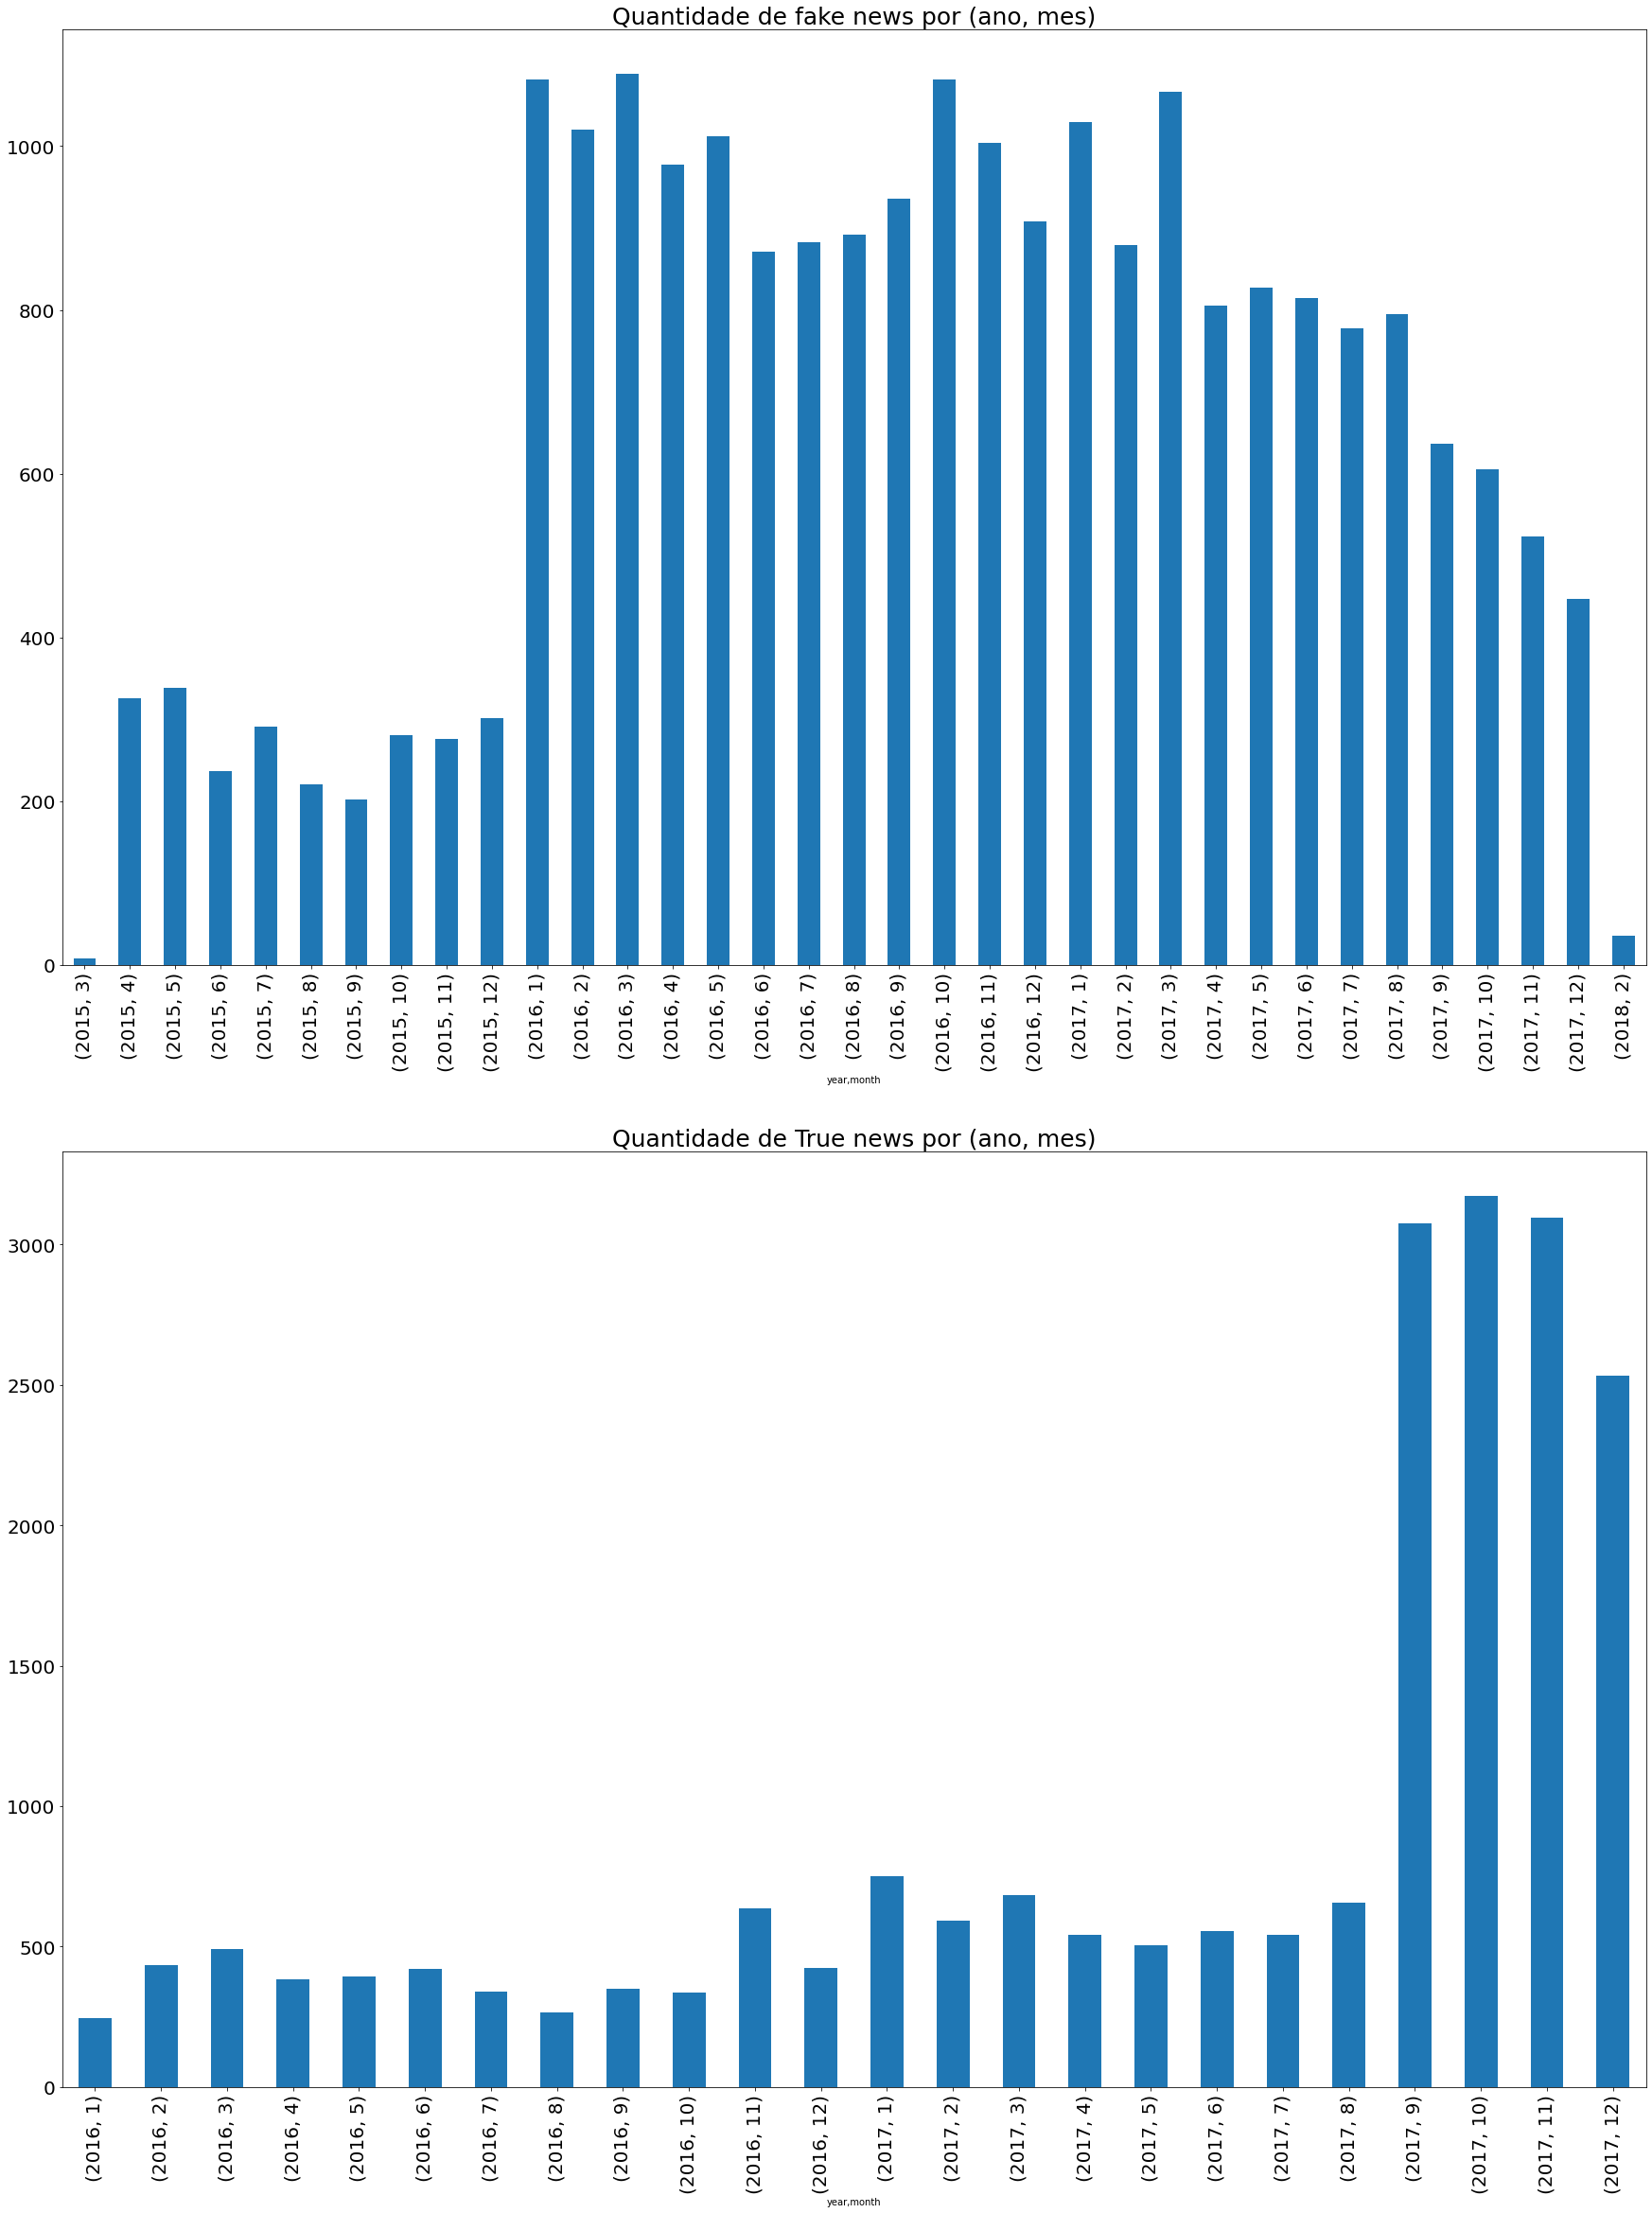

In [13]:
fig,axs = plt.subplots(2,1, figsize=(30,40))
fig.set_facecolor('white')
fake_news_df.groupby(by=['year', 'month'], axis=0).count()['title'].plot(kind='bar', ax=axs[0])
axs[0].set_title('Quantidade de fake news por (ano, mes)', fontsize= 25)
axs[0].tick_params(axis='both', which='major', labelsize=20)


true_news_df.groupby(by=['year', 'month'], axis=0).count()['title'].plot(kind='bar', ax=axs[1])
axs[1].set_title('Quantidade de True news por (ano, mes)', fontsize= 25)
axs[1].tick_params(axis='both', which='major', labelsize=20)



Observando o gráfico acima percebe-se que não dá para estabelecer uma relação direta entre quantidade de fake/true news e  tempo. Tanto uma quanto outra estam diretamente associados a evento e contextos ao quais foram divulgadas, esse dois fatores são coisa não previsíveis, ou seja, podem variar em qualquer momento do tempo e portanto não estão correlacionados com ele. Sendo assim decidiu-se não se considerar  a data de divulgação de uma notícia para ser prever se ela é ou não fake.

#### Temas Relacionado a fake news

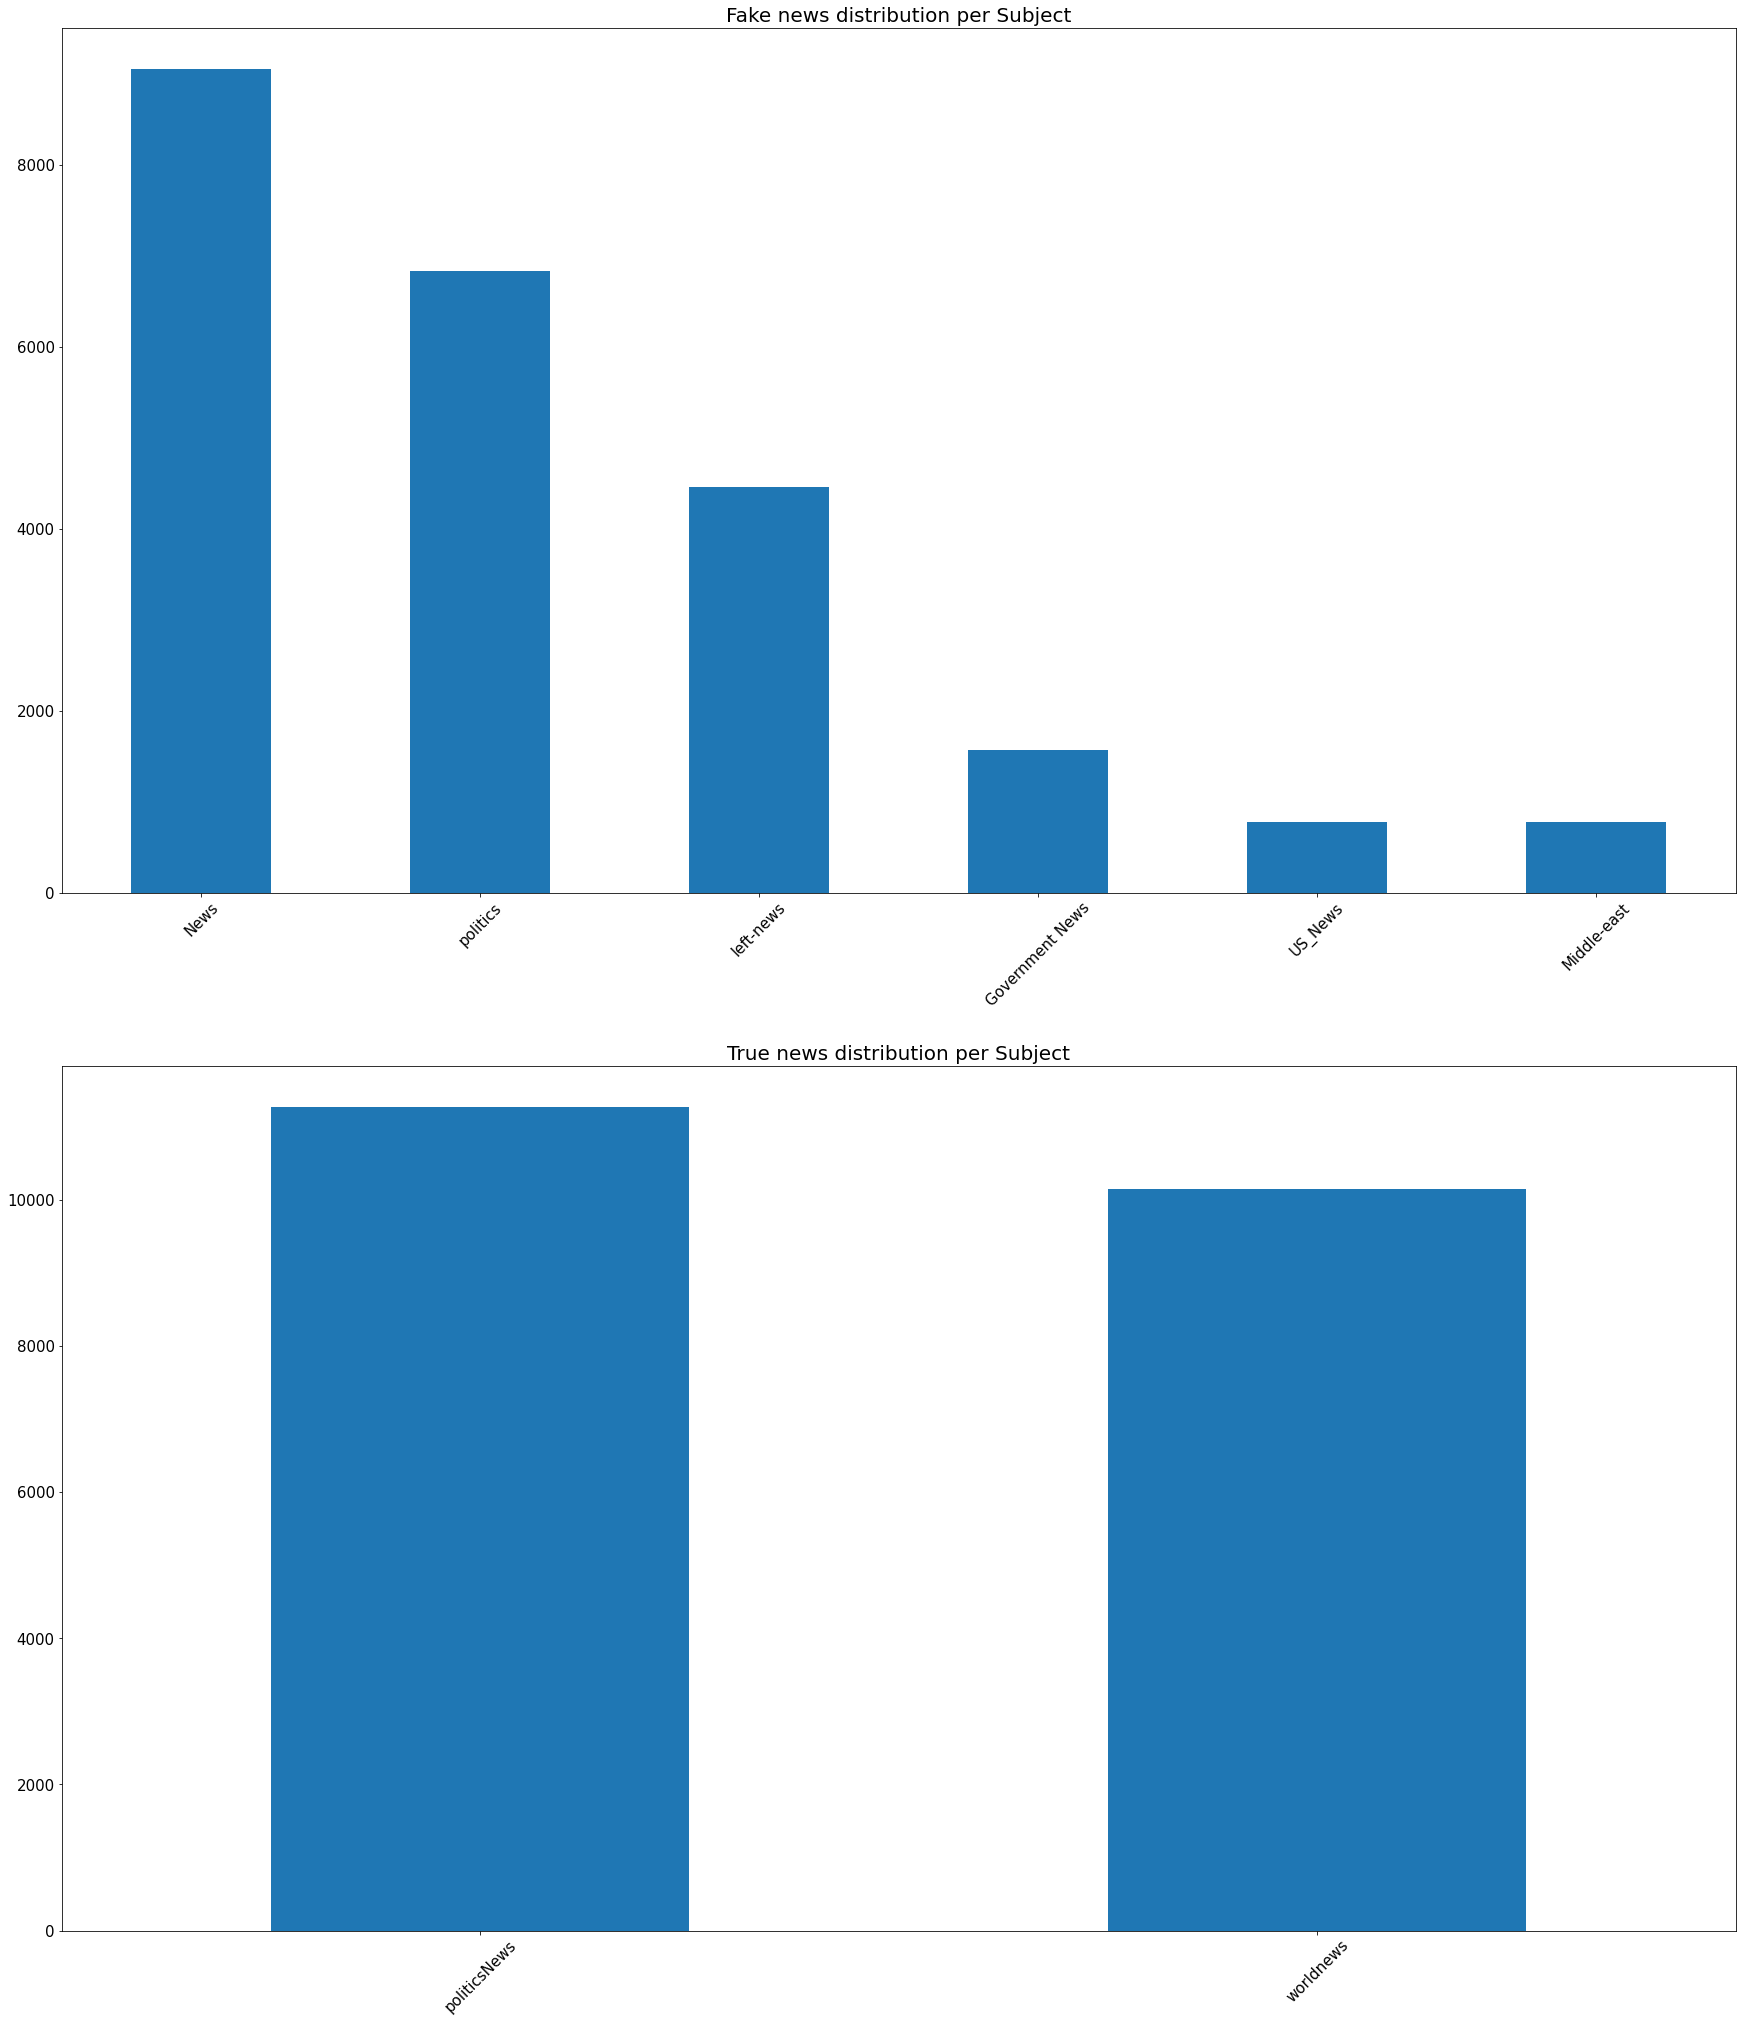

In [14]:
fig,axs = plt.subplots(2,1, figsize=(30,35))
fig.set_facecolor('white')
fake_news_df['subject'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Fake news distribution per Subject', fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].tick_params(axis='x', which='major', rotation=45)

true_news_count= true_news_df['subject'].value_counts()
true_news_count.plot(kind='bar', ax=axs[1])
axs[1].set_title('True news distribution per Subject', fontsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='x', which='major', rotation=45)

Ao se avaliar os temas, percebe-se que tanto as fake quanto as true news se concentram temas como a notícias gerais ou notícias que cujo tema giram em torno de política. As fake news são mais diversas e abordam mais temas, contudo eles pouco são representativos comparado aos dois temas principais. Sendo assim, constata-se que o tema  não diferencia uma notícia false de uma verdadeira. Portanto não iremos considerar-lo nas etapas posteriores.

#### Jutando os dados 

Através da análise preliminar do banco de  dados, constatou-se que somente os títulos e o texto da notícia eram relavante na sua classificação. Sendo assim consolidamos aqui os dados de interesse para então passar a etapa de preprocessamento.  E assim fez-se pela classe `Concatenator`, que não apenas  concatena as fake e true news num unico dataframe, mas também embaralha esses dados. O embaralhamento foi pensado justamente para garantir a variabilidade do banco de dados e assim garantir uma melhor apredizado de modelos na etapa de modelagem.

In [15]:
from Utils.Concatenator import Cocatenator

Durante o processo de desenvolvimento decidiu-se juntar o texto com o título da notícia, já que intuitivamente não faz sentido analisar os dois em separado para determinar uma fake news, assim foi feito por:

In [16]:
fake_news_df = pd.read_csv(FAKE_NEWS_DATASET)
fake_news_df['date'] = pd.to_datetime(fake_news_df['date'], errors='coerce')
fake_news_df = fake_news_df.dropna(subset=['date'])
fake_news_df['label'] = 1

true_news_df = pd.read_csv(TRUE_NEWS_DATASET)
true_news_df['label'] = 0

news_df = Cocatenator().concatenate(fake_news_df, true_news_df)
news_df = news_df[['title','text','label']]
#build news data
news_df['news']  = news_df[['title', 'text']].apply(lambda row: row['title'] + ' '  + row['text'], axis = 1) #joint title with text
news_df.to_csv(DATASET_PATH  + 'news.csv', sep=',')

Além disso, considerou-se o fato desse procedimento facilitar as demais etapas seguintes. Principalmente a etapa de modelagem. Com isso não teriamos que desenvolver dois modelos e depois junta-los e sim um único quer faria as classificações das notícias.

In [17]:
len(news_df)

44888

## Data Preprocessing

O preprecessamento de dados basicamente foi realizado considerando 2 etapas. A etapa de processamento de texto, e a etapa de codificação do texto em uma forma de vetor numérico.
Para etapa de  processamento de texto fizemoso processamento de texto que usualmente se faz dados de texto: 

- Remoção de caracteres especiais
- Tokenização
- Eliminação das "stopwords"
- Steamming (normalização dos tokens)

Feito isso, utilizamos os tokens normalizados para realizar  as codificações mediante a ténicas de 'feature extraction', um processo que basicamente transforma palavras ou frases em vetores.
Sendo assi duas técnicas foram utilizadas:

- **embedding doc** -> Consite em primeiramente transforma cada palavra do corpus em um número inteiro e a sequencia de palavras de cada frase num vetor. Sendo assim cada setença equivale a uma sequencia numérica de tamanhos diferente. Em seguida a é aplicado um padding que apenas equaliza os vetores relativos as sentenças a um mesmo tamanho.
- **word2vector** -> Consite em transformar as palavras contidas numa sentença numa representação vetorial de tamanho fixo. O vetor que  representar aquela palavra esta diretamente relacionado ao significado dela no contexto ao qual está inserido, assim 2 vetores próximos representar palavras com significados parecidos dado o seu contexto.


Devido ao fato dos dados a serem processados requerem um tempo de processamento significativo, decidiu-se separar o preprocessamento através dos scripts `transform_text_to_oneHotpad.py` e `transform_text_to_w2v.py`. Os scripts fazem todo o préprocessamento necessário aos dados e os salvam em arquivos .csv, aos quais usaremos para dar processeguimento a construção de modelos.
Os mesmo scripts podem ser encontrado no pasta ***PreProcessing*** deste projeto.

O logs de execução desses scripts podem ser conferidos abaixo:

**transform_text_to_oneHotpad.py**:
<details>
    <summary>Logs oneHotPadding enconding  logs implementation</summary>
    ```
        2023-07-02 06:27:31.820688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
        2023-07-02 06:27:31.820909: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


        ======================================================================================================================================================
        Inicializing Preprocessing setup...
        Download 'punkt' NLTK package

        [nltk_data] Downloading package punkt to
        [nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
        [nltk_data]   Package punkt is already up-to-date!


        Download nltk 'stopwords' package

        [nltk_data] Downloading package stopwords to
        [nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
        [nltk_data]   Package stopwords is already up-to-date!
        [nltk_data] Downloading package rslp to
        [nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
        [nltk_data]   Package rslp is already up-to-date!
        Setup  done!

        ****************************************************************************************************
        Starting Preprocessing News...

        EspcialCharRemover started preprocessing !!
        Removing Especial Characters...
        Especial Characters removed !

        WordTokenizer started preprocessing !!
        Tokenizing Sentences...
        Tokenization Done!

        StopWordsEliminator started preprocessing !!
        Eliminating stopwords...
        Stop words Eliminated !

        TextRSLPSSteammer started preprocessing !!
        Steamming words...
        Words Steammed !

        Getting Setences...

        Got Senteces !

        OneHotPadEncoder started preprocessing !!
        Building onehotrep encoding..

        onethotrep encoding built !

        Building Embedding doc...

        Embedding Doc Built !

        News Preprocessing Done!

        ======================================================================================================================================================
        Saving Data..

        Data Saved
        Preprocessing Done !

        ****************************************************************************************************
        ```
</details>
   

**transform_text_to_w2v.py**:
<details>
    <summary>Logs Word2Vector enconding  logs implementation</summary>
    ``
        2023-07-02 06:52:47.442005: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
    2023-07-02 06:52:47.442368: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
    Download 'punkt' NLTK package

    [nltk_data] Downloading package punkt to
    [nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
    [nltk_data]   Package punkt is already up-to-date!


    Download nltk 'stopwords' package

    [nltk_data] Downloading package stopwords to
    [nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
    [nltk_data]   Package stopwords is already up-to-date!
    [nltk_data] Downloading package rslp to
    [nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
    [nltk_data]   Package rslp is already up-to-date!


    Inicializing Preprocessing setup...
    Setup  done!

    ****************************************************************************************************
    Starting Preprocessing...

    ######################################################################################################################################################
    Preprocessing news data...

    EspcialCharRemover started preprocessing !!
    Removing Especial Characters...
    Especial Characters removed !

    WordTokenizer started preprocessing !!
    Tokenizing Sentences...
    Tokenization Done!

    StopWordsEliminator started preprocessing !!
    Eliminating stopwords...
    Stop words Eliminated !

    TextRSLPSSteammer started preprocessing !!
    Steamming words...
    Words Steammed !

    Training word2vec model...

    Labelizeing data...

    44898it [00:00, 105755.09it/s]
    Labelizing done !

    Building Train Words...

    100%|███████████████████████| 44898/44898 [00:00<00:00, 1950934.06it/s]
    Train words ready!

    Word2Vector training completed !

    Word2VectorEncoder started preprocessing !!
    Transforming words in vectors...

    Building scaled vector...

    44898it [01:34, 473.72it/s]


    Words Encoded as vectors !
    News preprocessed !
    ######################################################################################################################################################
    Preprocessing Done!

    ======================================================================================================================================================
    Saving Data..

    Data Saved
    Preprocessing Done !

    News vocabulary size: 26935
    ****************************************************************************************************
    ```
   
</details>
 

## Modelagem

Feito todo o devido preprocessamento fez-se o split dos dados em treino e teste e fez-se o hodoult em cada um dos modelos. A ideia é assim selecionar o modelo que  melhor peformou para posteriormente otimizar seus hiperpamâmetros. 

Sendo assim seleciou-se 4 modelos a partir da leitura de dois artigos da plataforma Medium, dos quais diziam que esse modelos apresentaram resultados promissores para classificação de texto:

 - Artigo I -> [Fake news detector with deep learning approach (Part-II) Modeling](https://towardsdatascience.com/fake-news-detector-with-deep-learning-approach-part-ii-modeling-42b9f901b12b)
 -  Artigo II -> [Deep Learning Techniques for Text Classification](https://towardsdatascience.com/deep-learning-techniques-for-text-classification-78d9dc40bf7c)

Sendo assim utilizamos os seguintes arquiteturas:

- Uma arquitetura deepLearning Simple Sem recorrência (Construído por conta própria)
- Uma arquitetura Embedding com LSTM (Artigo I)
- Uma arquitetura TCN (Artigo II)
- Uma arquitetura utilzando rede neural convolucional (CNN1D) - (Artigo II)
- Um arquitetura utilizado um Emsemble com rede neurais convolucionais e GRU bidirecional ( CNNBiGRU) - (Artigo II)

A primeira citada é uma arquitetura simples e construída ao longo do projeto.  A segunda arquitetura  possui recorrência por meio de uma rede LSTM, porém não utiliza nenhum conhecimento pre-treinamento. Já as 3 últimas se utilizam de um modelo  *Word2Vector* pretreinado a partir do dataset do google com 100 bilhoes de palavras. 

Mais informações sobre o modelo pretreinado utilizado pode ser encontrado e baixado no link abaixo:

   [Informativo word2vec-google-news-300 HuggingFace ](https://huggingface.co/fse/word2vec-google-news-300)


O modelo pré-treinado acima juntamente com vocabulário indexado construido no pré-processamento foi utilizado para criar uma matrix de pesos  que foi oferecido como entrada a esses modelos, uma espécie de conhecimento prévio antes do treinamento. A matrix tanto poderia ser ajustada ao longo do treinamento(Dynamic) como permanecer intacta(Static):

 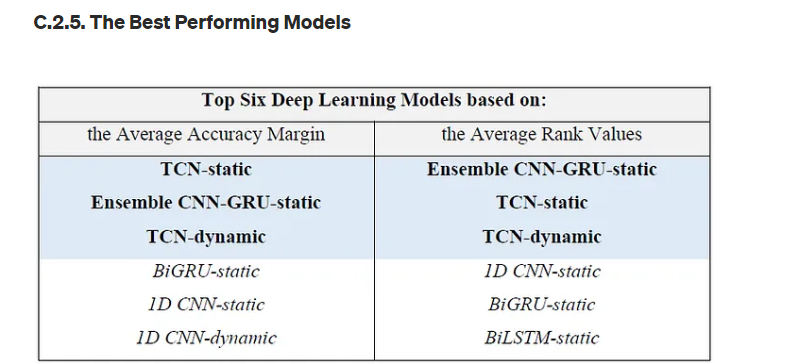


Assim sendo utilizou-se esses modelos com treinmento  dinâmico, por meio  do parâmetro ```Trainable=True ```.

Vale ressaltar que para facilitar o desenvolvimento deste projeto, modularizamos todas as parte relativas a modelagem no projeto.  Sendo assim cada arquitetura utilizada foi  definida como uma classe dentro da pasta `Modeling/Architectures/`:


| Nome Classe | Descrição Arquitetura |
| --- | --- |
| SimpleDense | Arquitetura deepLearning Simple Sem recorrência |
| EmbeddingLSTM | Arquitetura Embedding com LSTM  |
| TCNModel  | Arquitetura TCN |
| CNN1D.py | Arquitetura utilzando rede neural convolucional |
|  EnsembleCNNBiGRU | Arquitetura utilizado um Emsemble com rede neurais convolucionais e GRU bidirecional |





### Avaliação performance dos modelos durante o treinamento

 O treinamento dos algorítmos acima foi feito por meio do script `train_models.py` na pasta `Modeling/Architectures/Training/` devido a questões de tempo de execução ser demasiadamente grande.
 Esse script fez  o treinamento para geração de cada dos modelos relacionados às arquiteturas acima e e treinou cada uma delas considerando as duas codificações utilizadas no preprocessamento
 ( OneHotPadding e Word2Vector). Além disso salvou os as curvas de treinamento e validação e a média  da acurácia e da função erros no treino e na validação. 
 
 Durante o treinamento dos modelos a métrica  utilizada foi a acurárcia fora utilizada porque o banco de dados  utilizado possuia quantidade de fake e true news balanceada, não haver nenhum pré-requisito previo , para fins de simplificação e explanabilidade.

 Sendo assim vamos analisar os gráficos gerados a partir do treinamentos assim como o resultado a  partir do treinamento de todos os modelos. 

In [18]:

from IPython.display import Image, display

#### Avaliação dos modelos treinados utilizando OneHotPadding

A seguir as curva de treinammento geradas a partir do treinamento de modelos com as notíficas codificadas utilizando o OneHotPadding:

##### EmbeddingLTSM

In [19]:
def display_img(file_name):
    emb_doc_embeddingLSTM_img = Image(TRAIN_HIST_ASSET_PATH + '/' + file_name)
    display(emb_doc_embeddingLSTM_img)
    

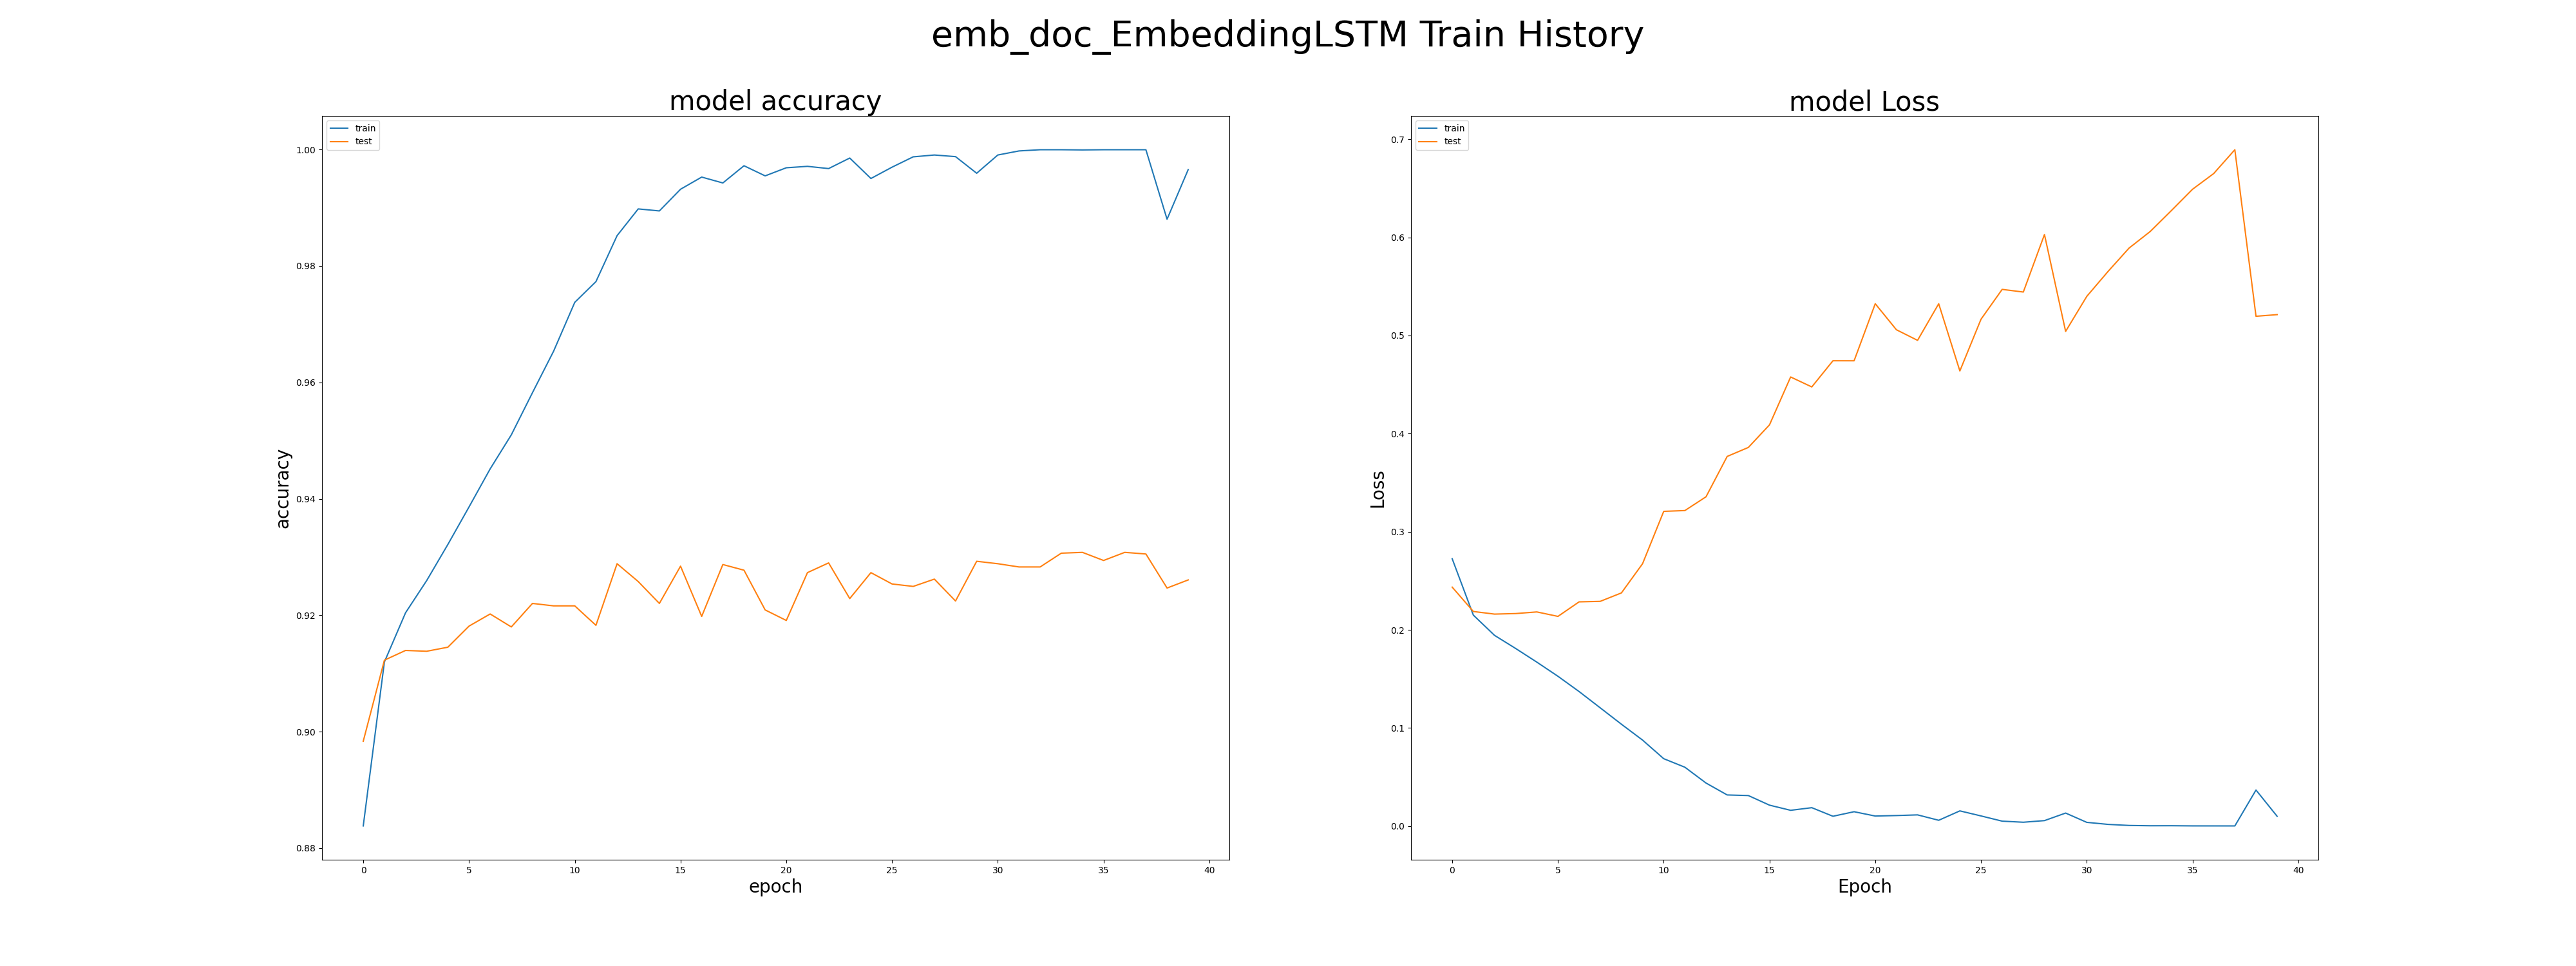

In [20]:
#print train history
display_img('emb_doc_EmbeddingLSTM.png')

##### Simple Dense

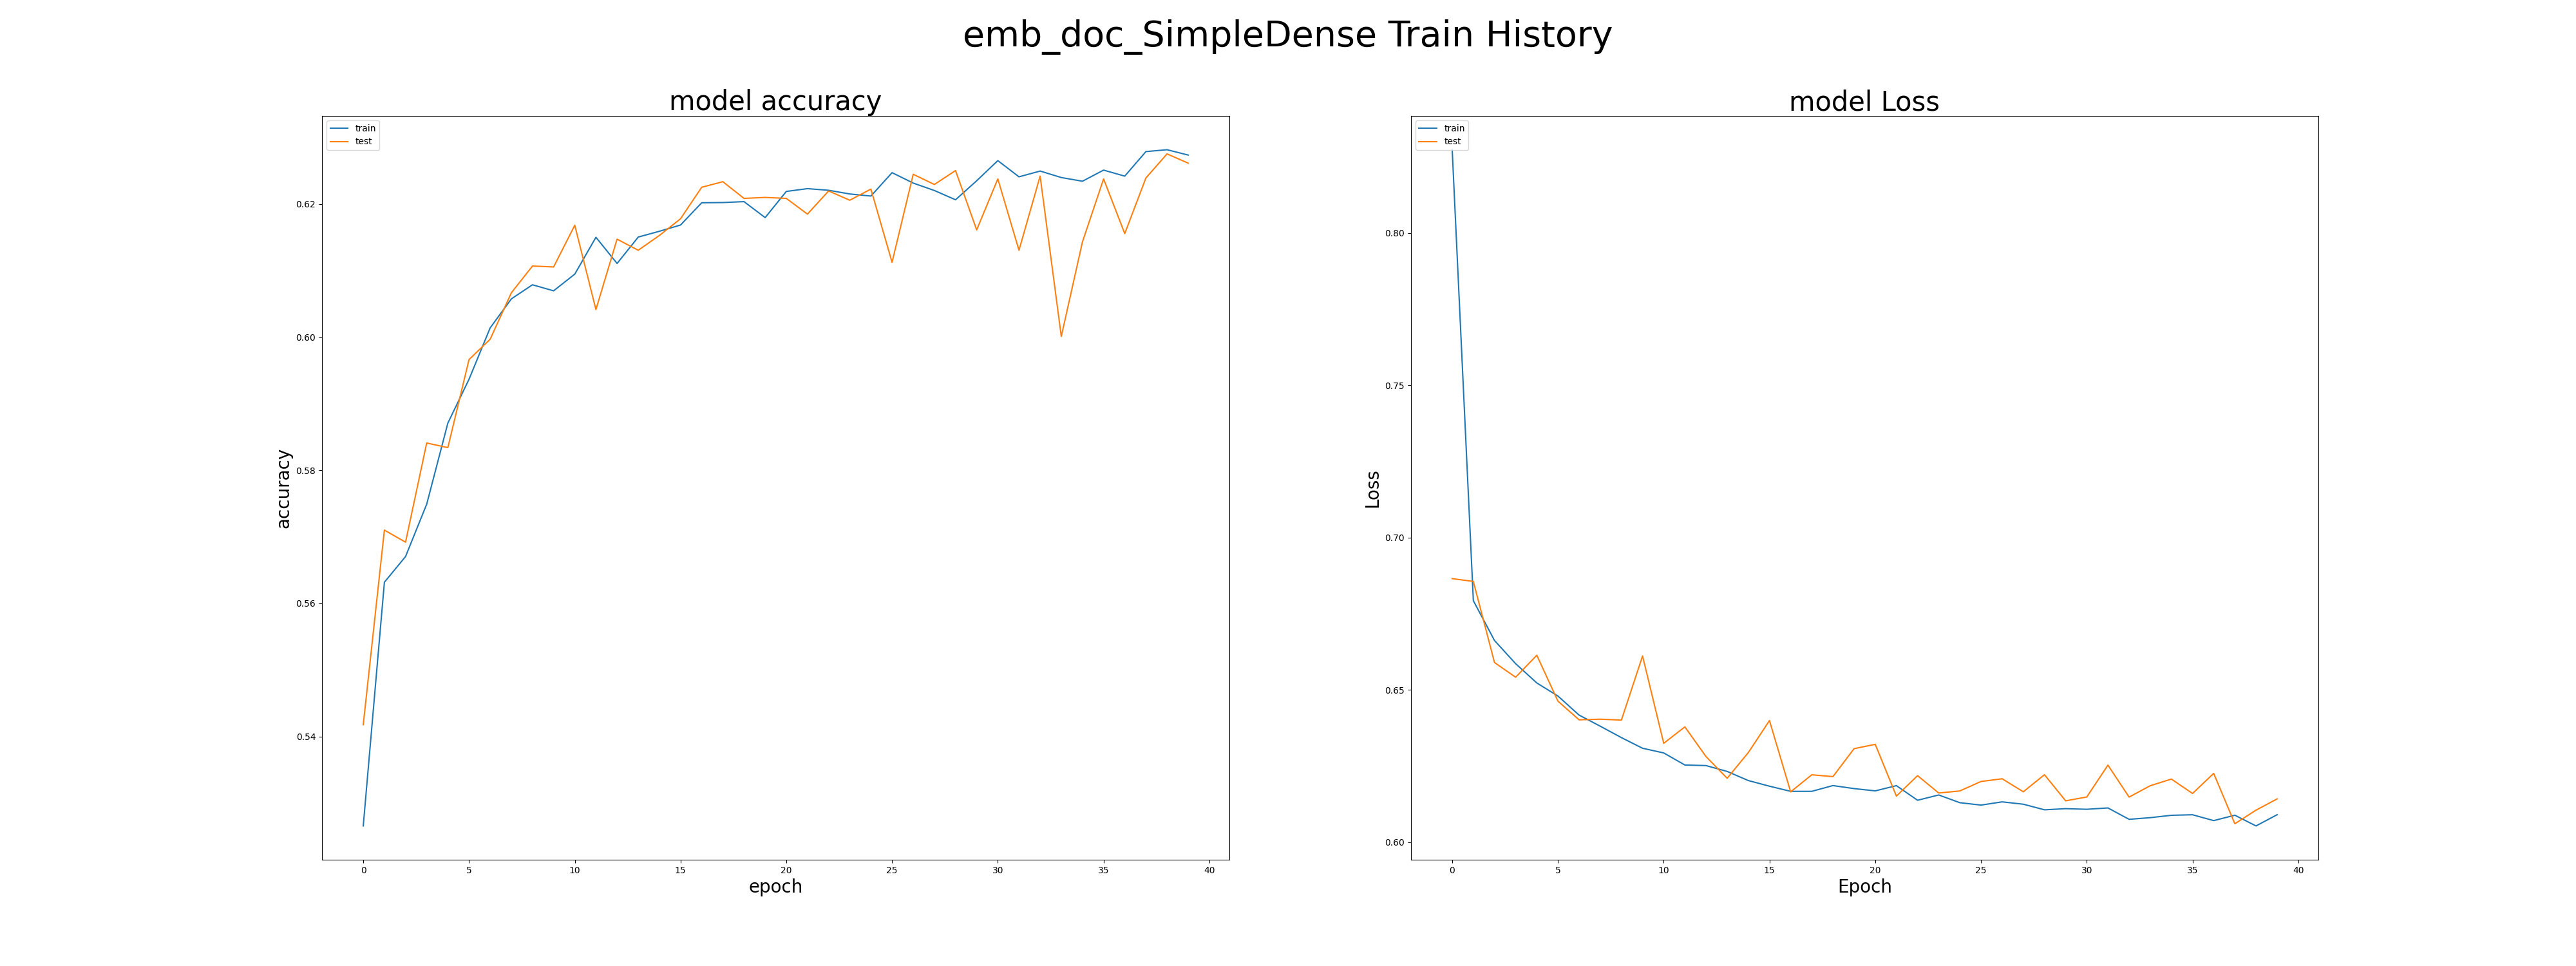

In [21]:
#print train history
display_img('emb_doc_SimpleDense.png')

#### TCN

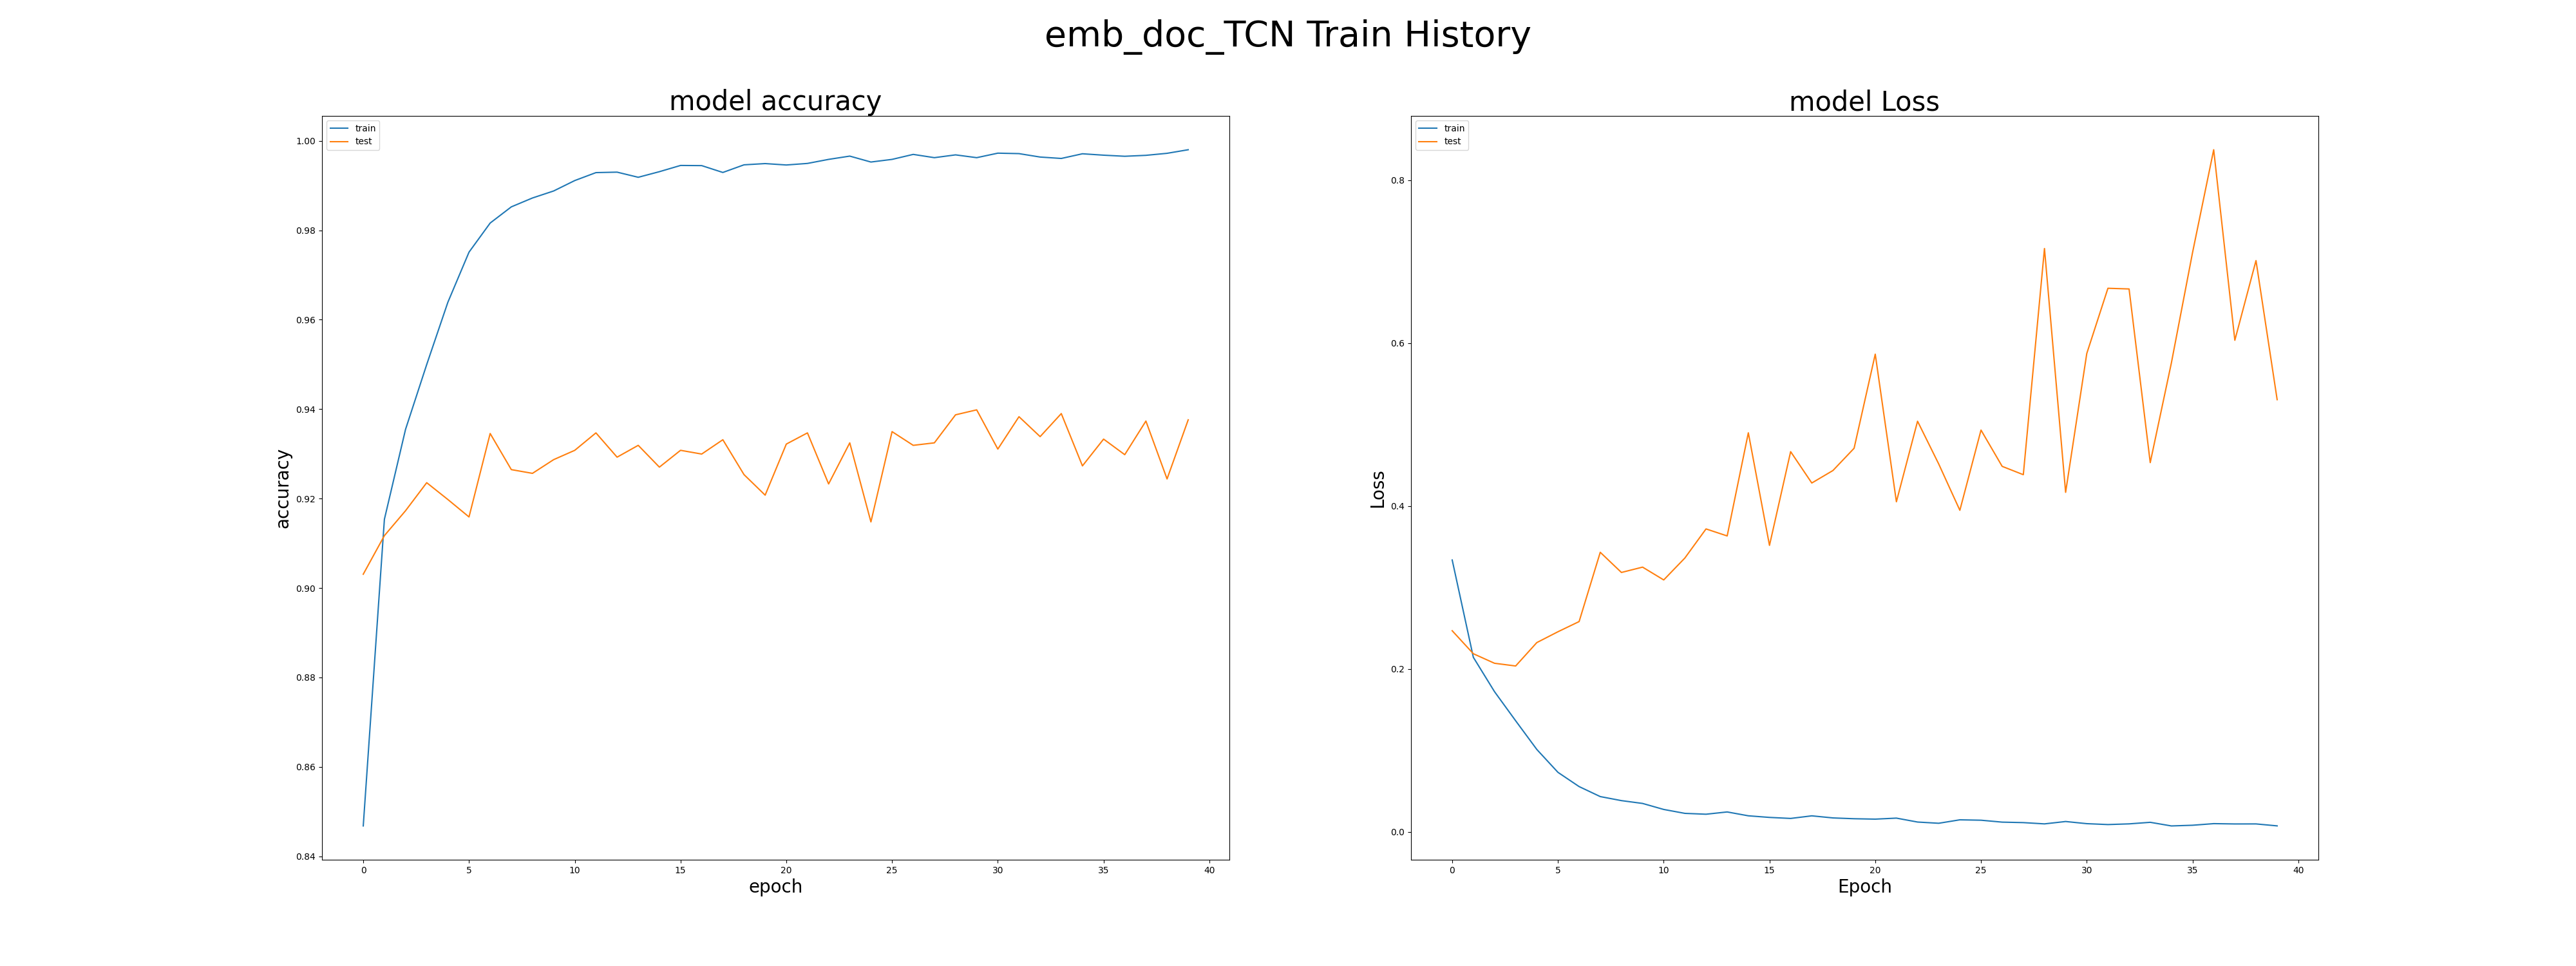

In [22]:
#print train history
display_img('emb_doc_TCN.png')

##### CNN1D

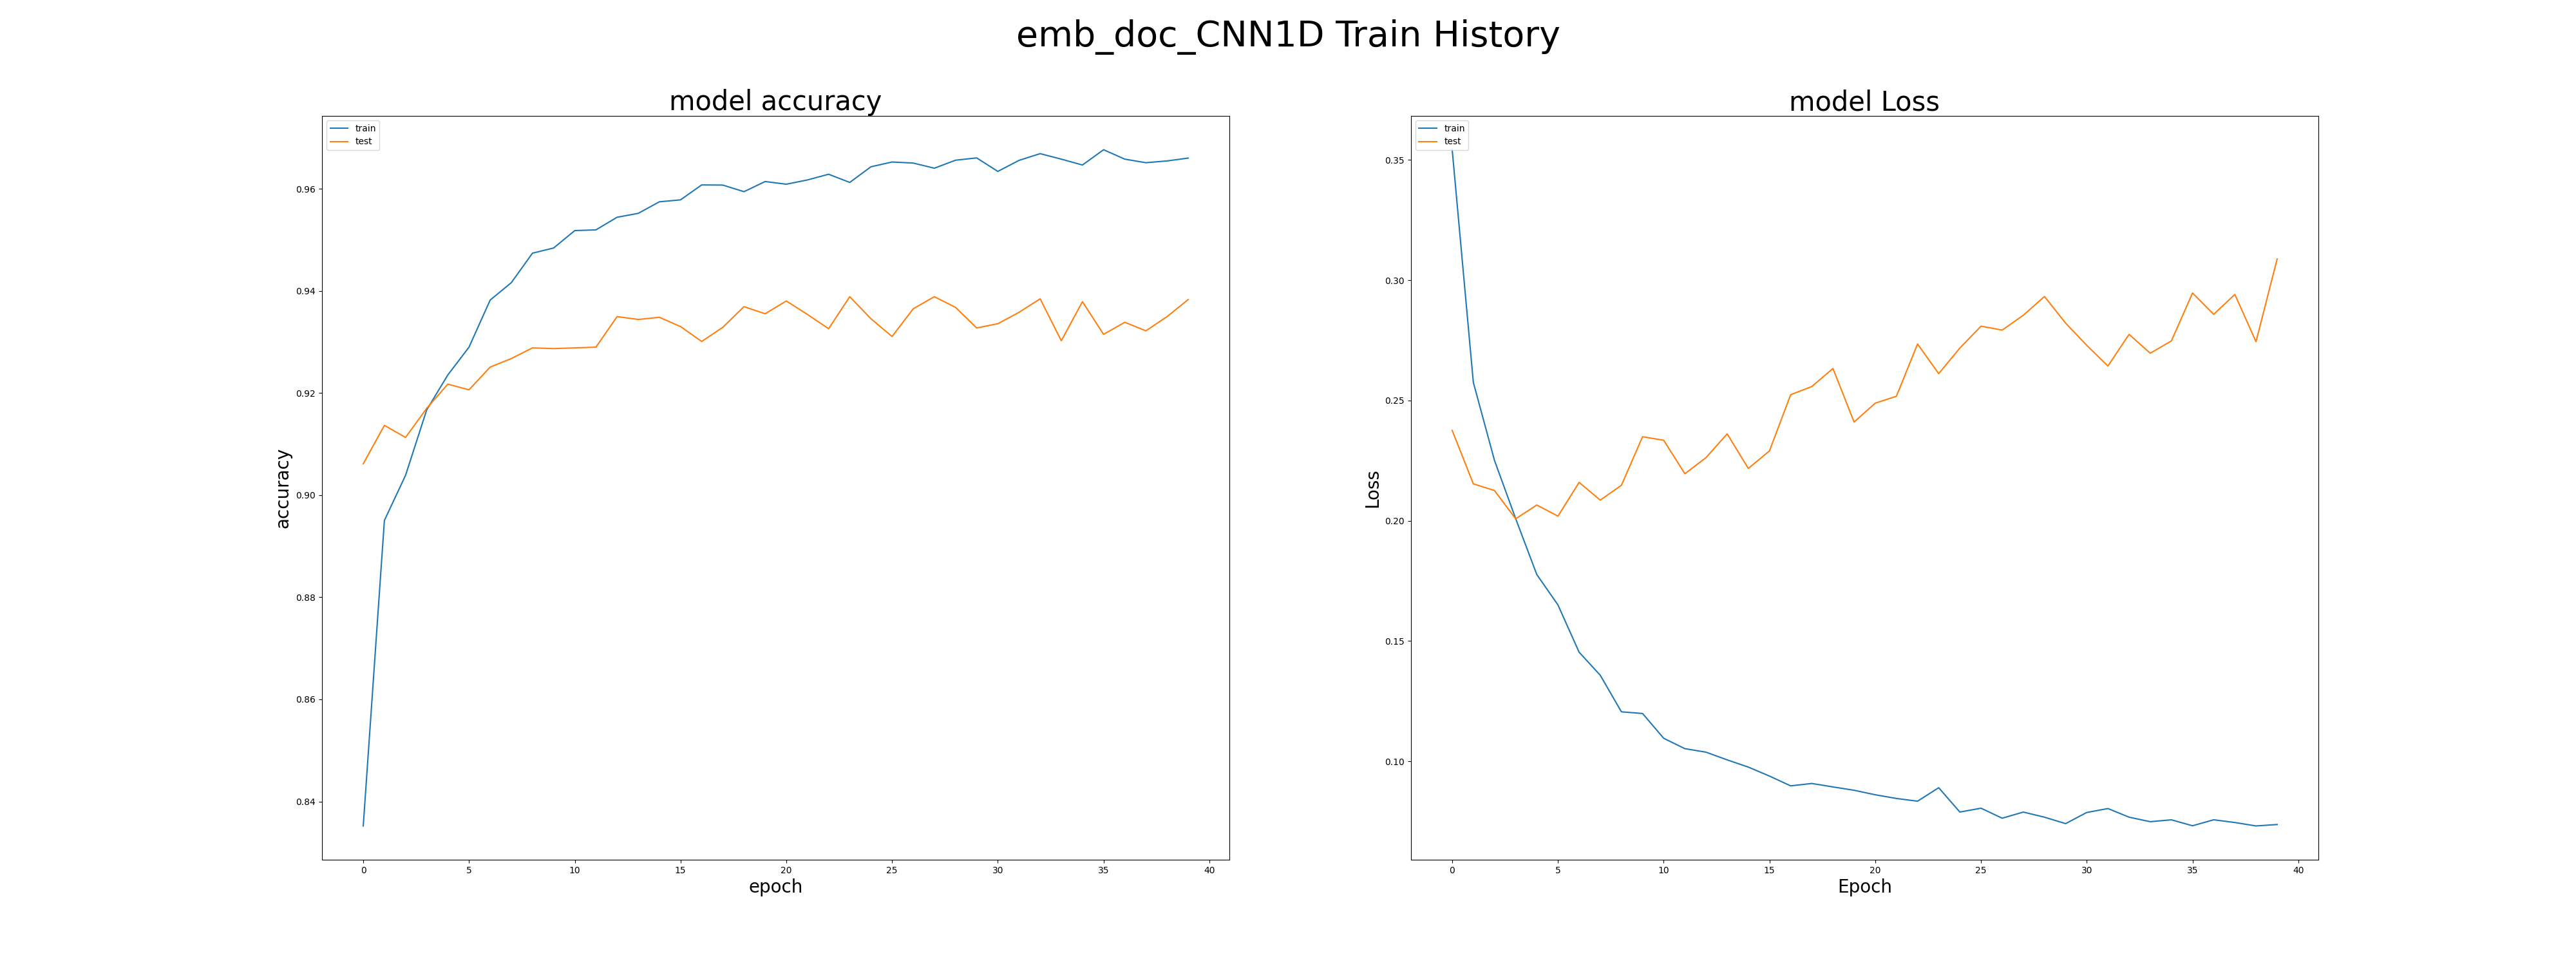

In [23]:
#print train history
display_img('emb_doc_CNN1D.png')

##### CNNBiGRU

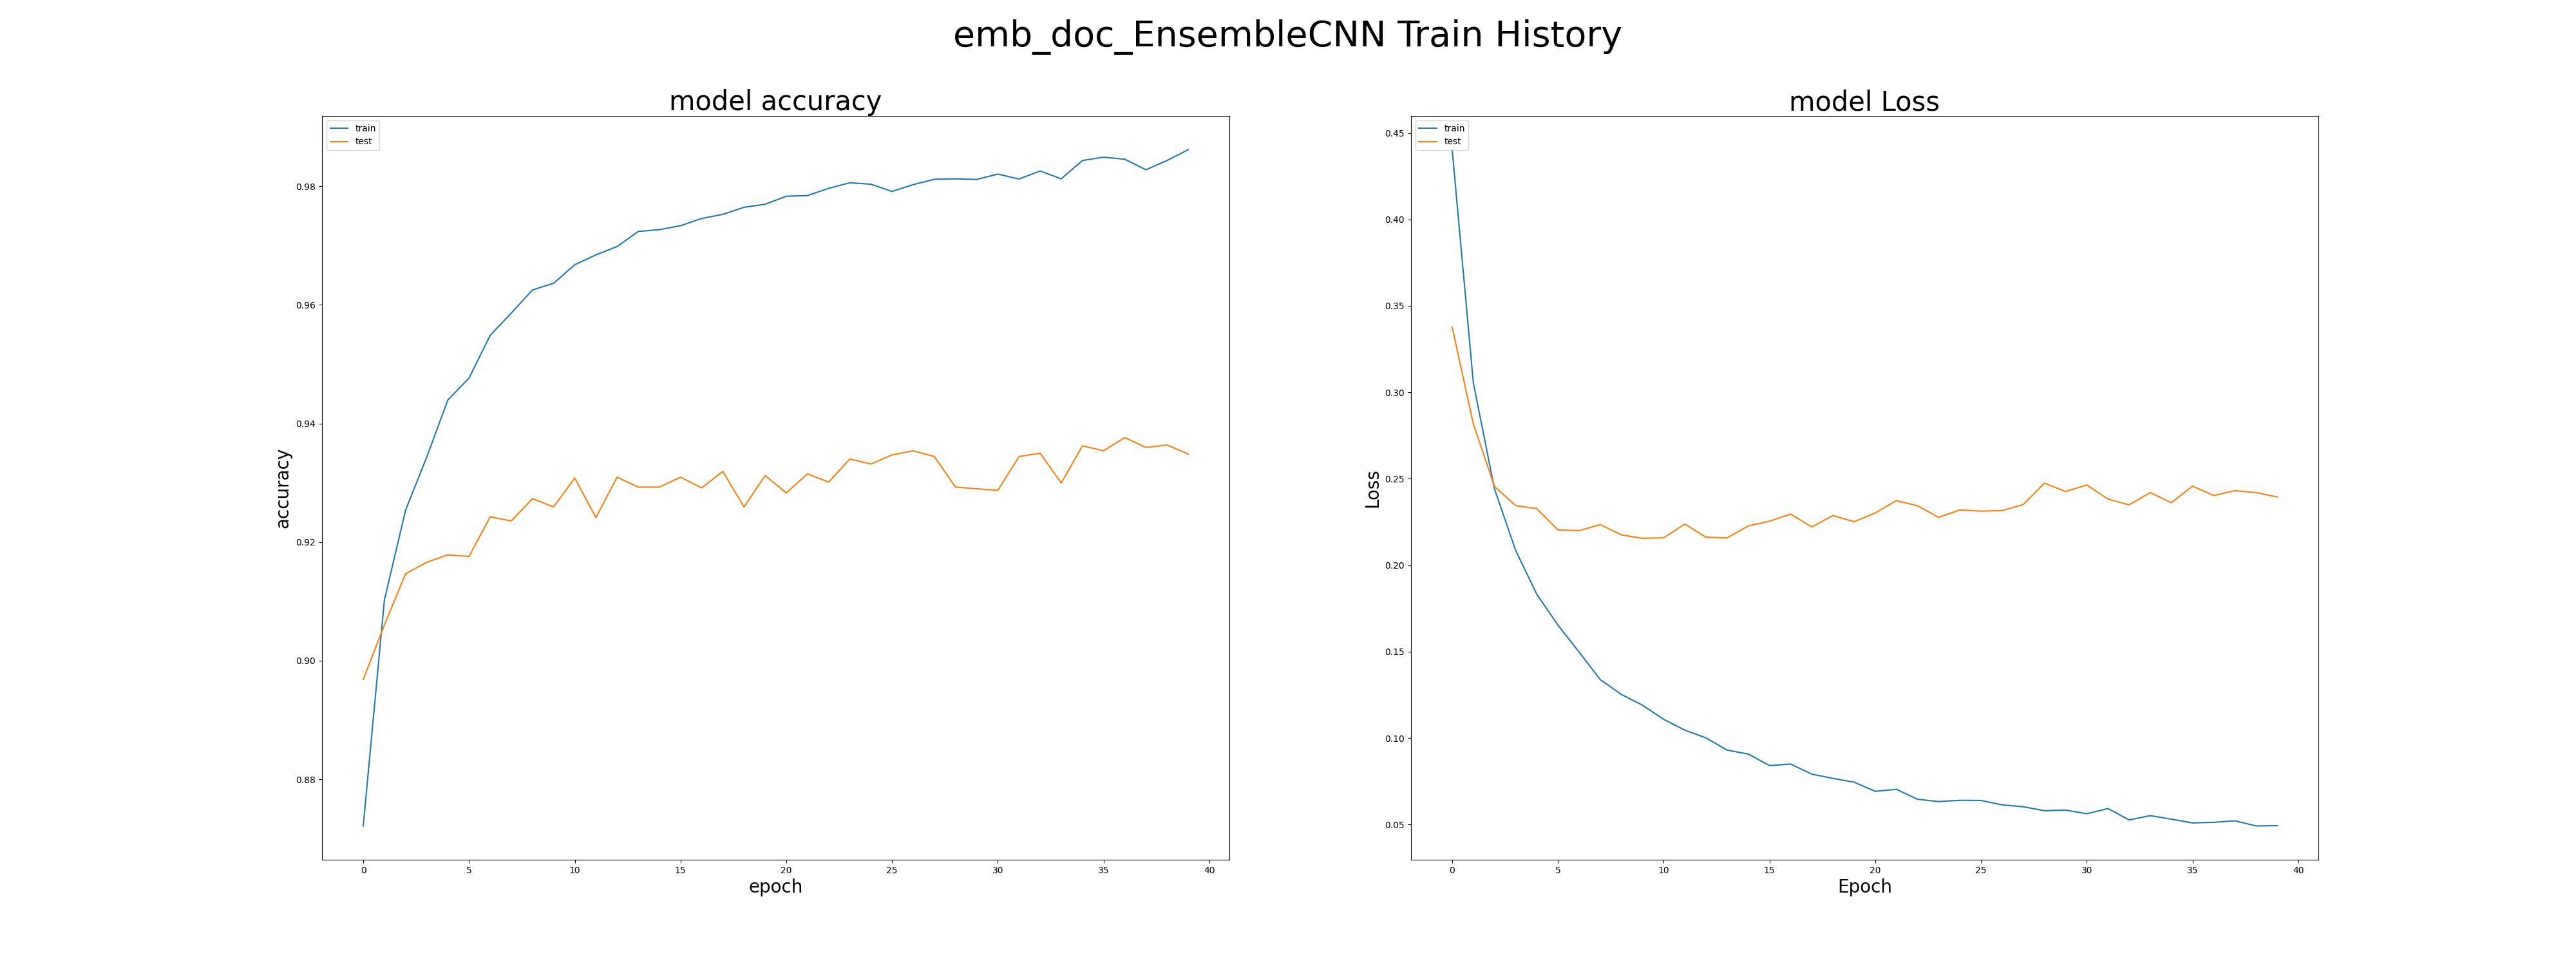

In [24]:
#print train history
display_img('emb_doc_EnsembleCNN.png')

Ao se avaliar os modelos percebe-se que todos menos o "Simple Dense" apresentam umc comportamente overfitting. Temos modelos com uma alta acurácia no treino e com uma acurácia de validação significativamente menor que do que a de treino. Esses modelos não se demonstram ser confiáveis para realizar predições em dados fora de treino e portanto os resultados não seria satisfatório. Já o modelo denominado de Simple dense até apresenta um comportamento desejável entretando a acurácia e o erro por ele alcançada apresentam-se insatisfatórios, a acurácia é relativamente muito baixa certa de 62%, o que seria um pouco melhor do que jogar uma moeda para o alta para decidir se a notícia é falsa ou verdaedeira. Já o erro se mostra alto, tendo o valor de  60%. Sendo assim os resultados  obitos por meio de treinamento com dados codificados em OneHotPadding, se mostram insatifatórios.  

### Vectorizer codification

A seguir as curva de treinammento geradas a partir do treinamento de modelos com as notíficas codificadas utilizando o Word2Vector:

##### VEmbeddingLSTM

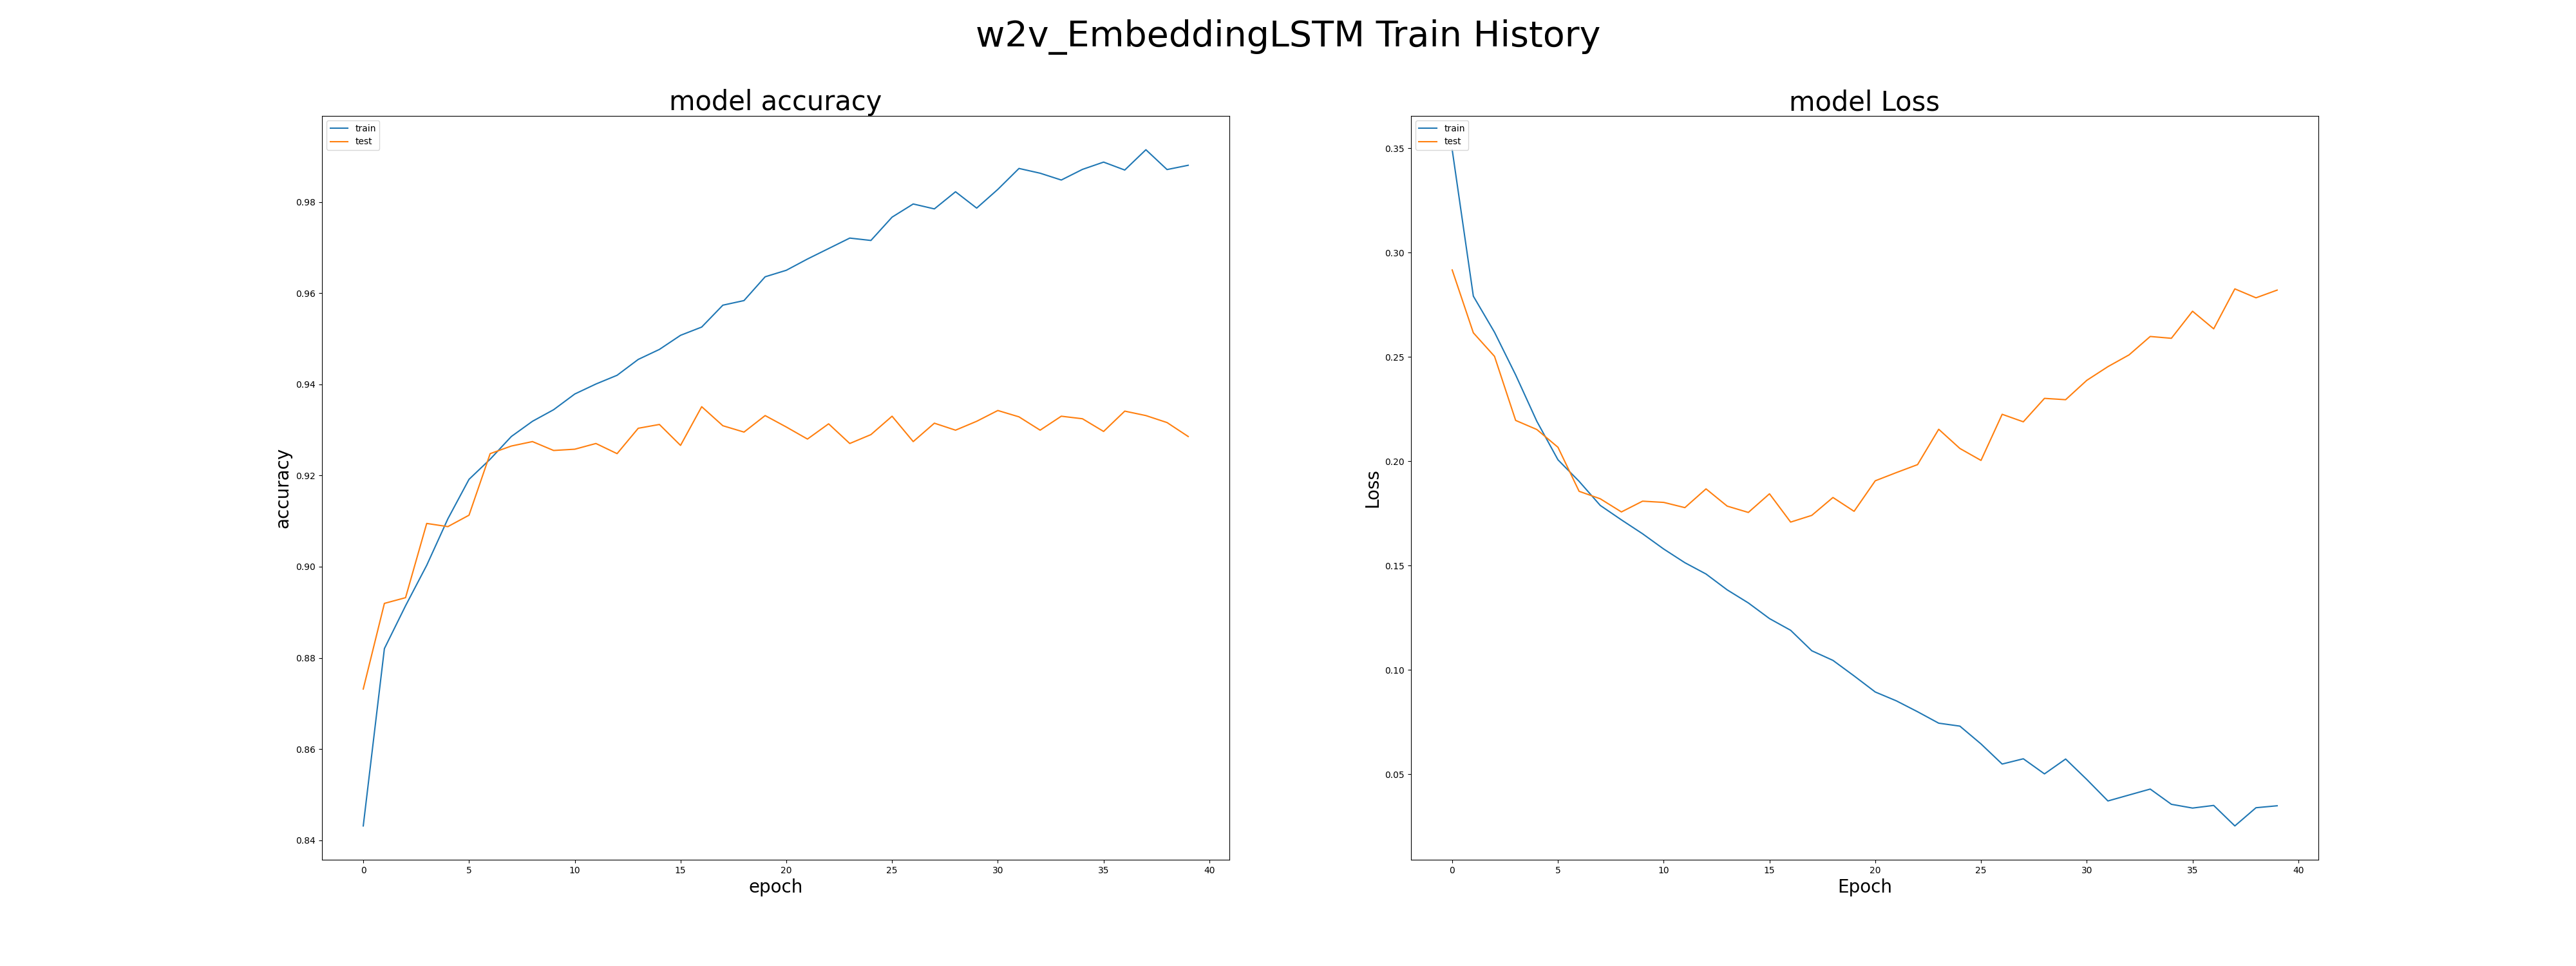

In [25]:
#print train history
display_img('w2v_EmbeddingLSTM.png')

##### Simple Dense

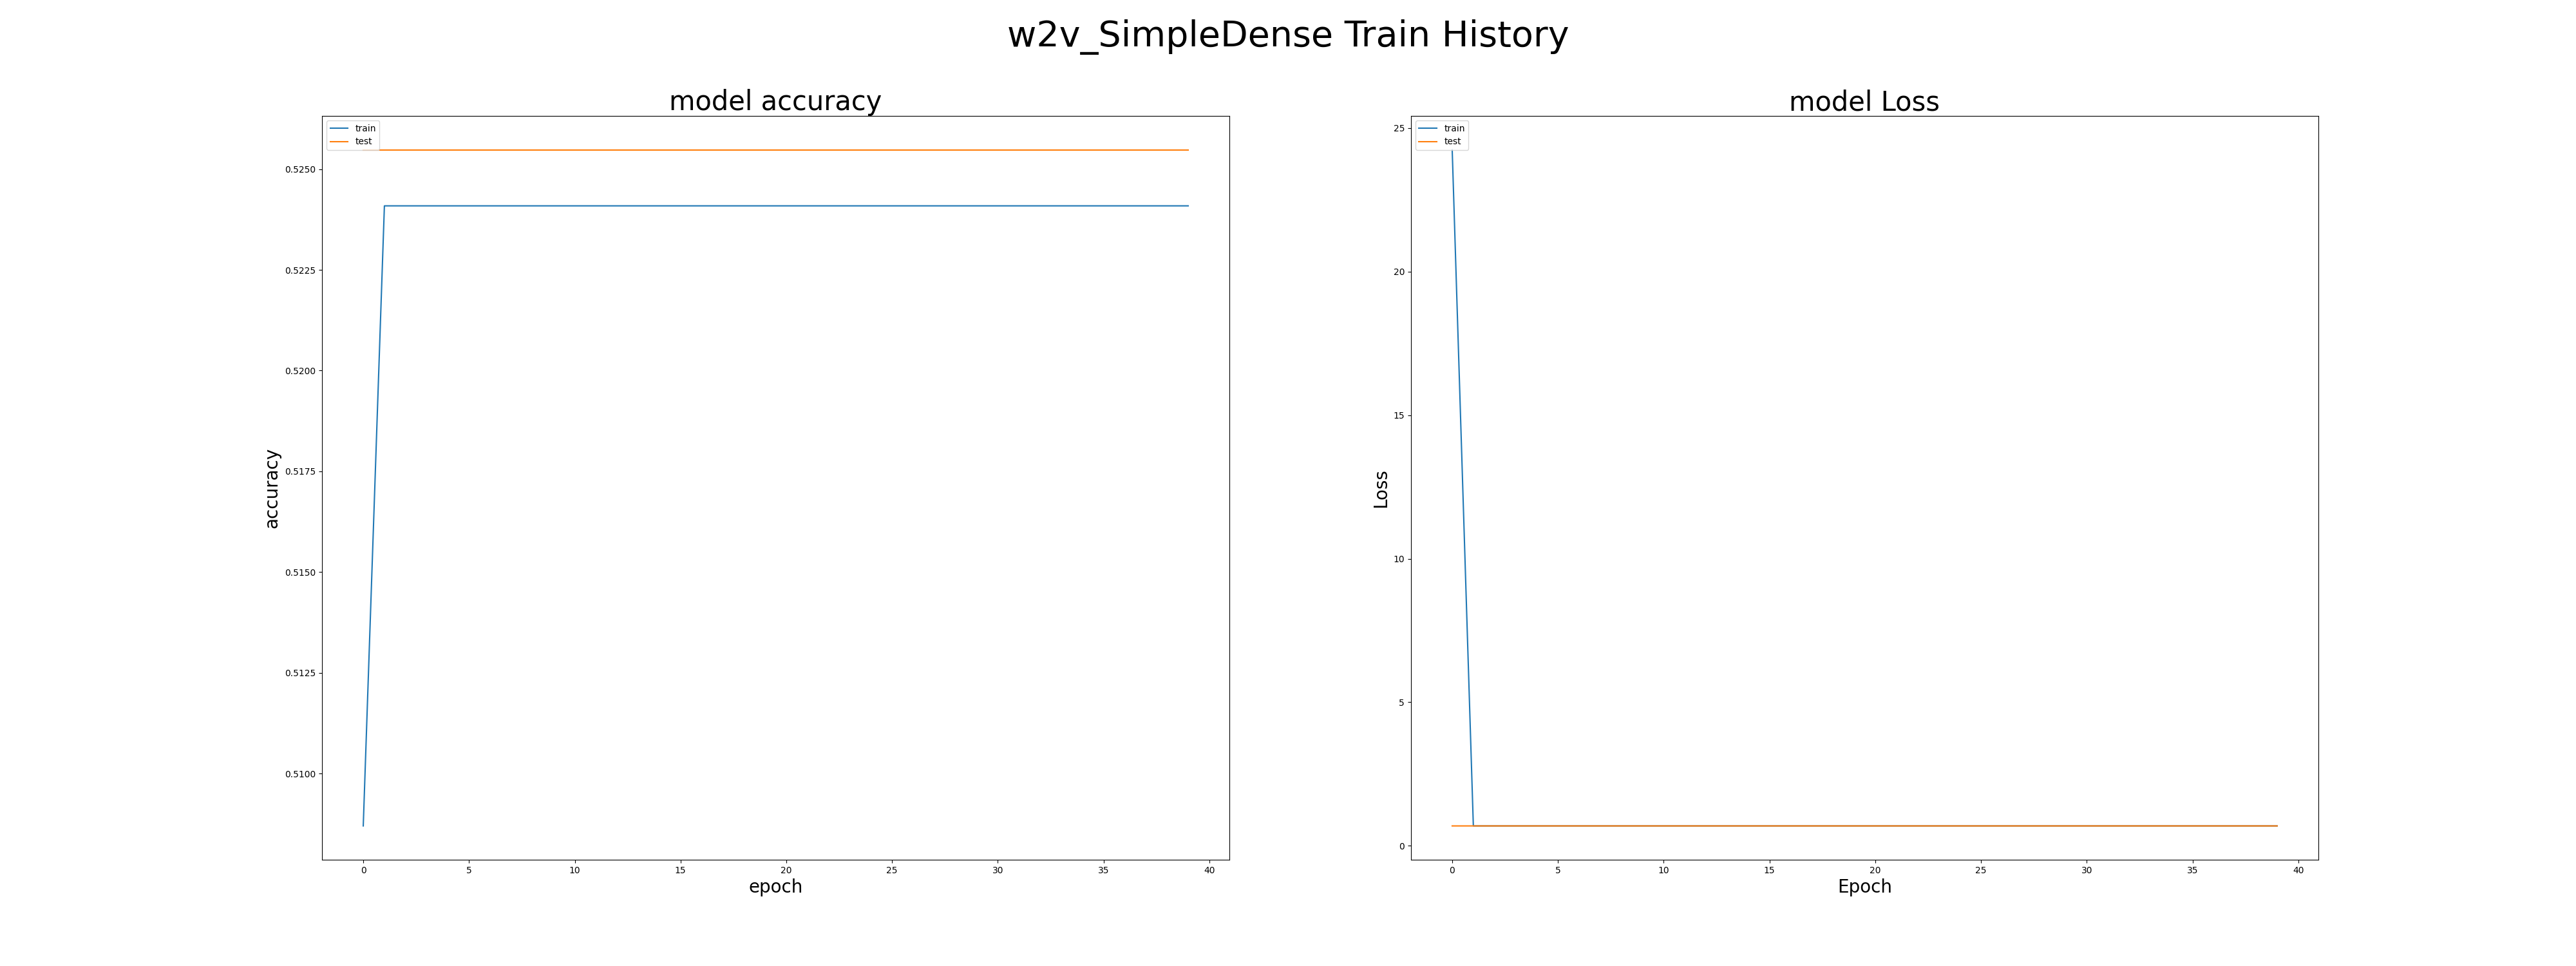

In [26]:
#print train history
display_img('w2v_SimpleDense.png')

#### TCN

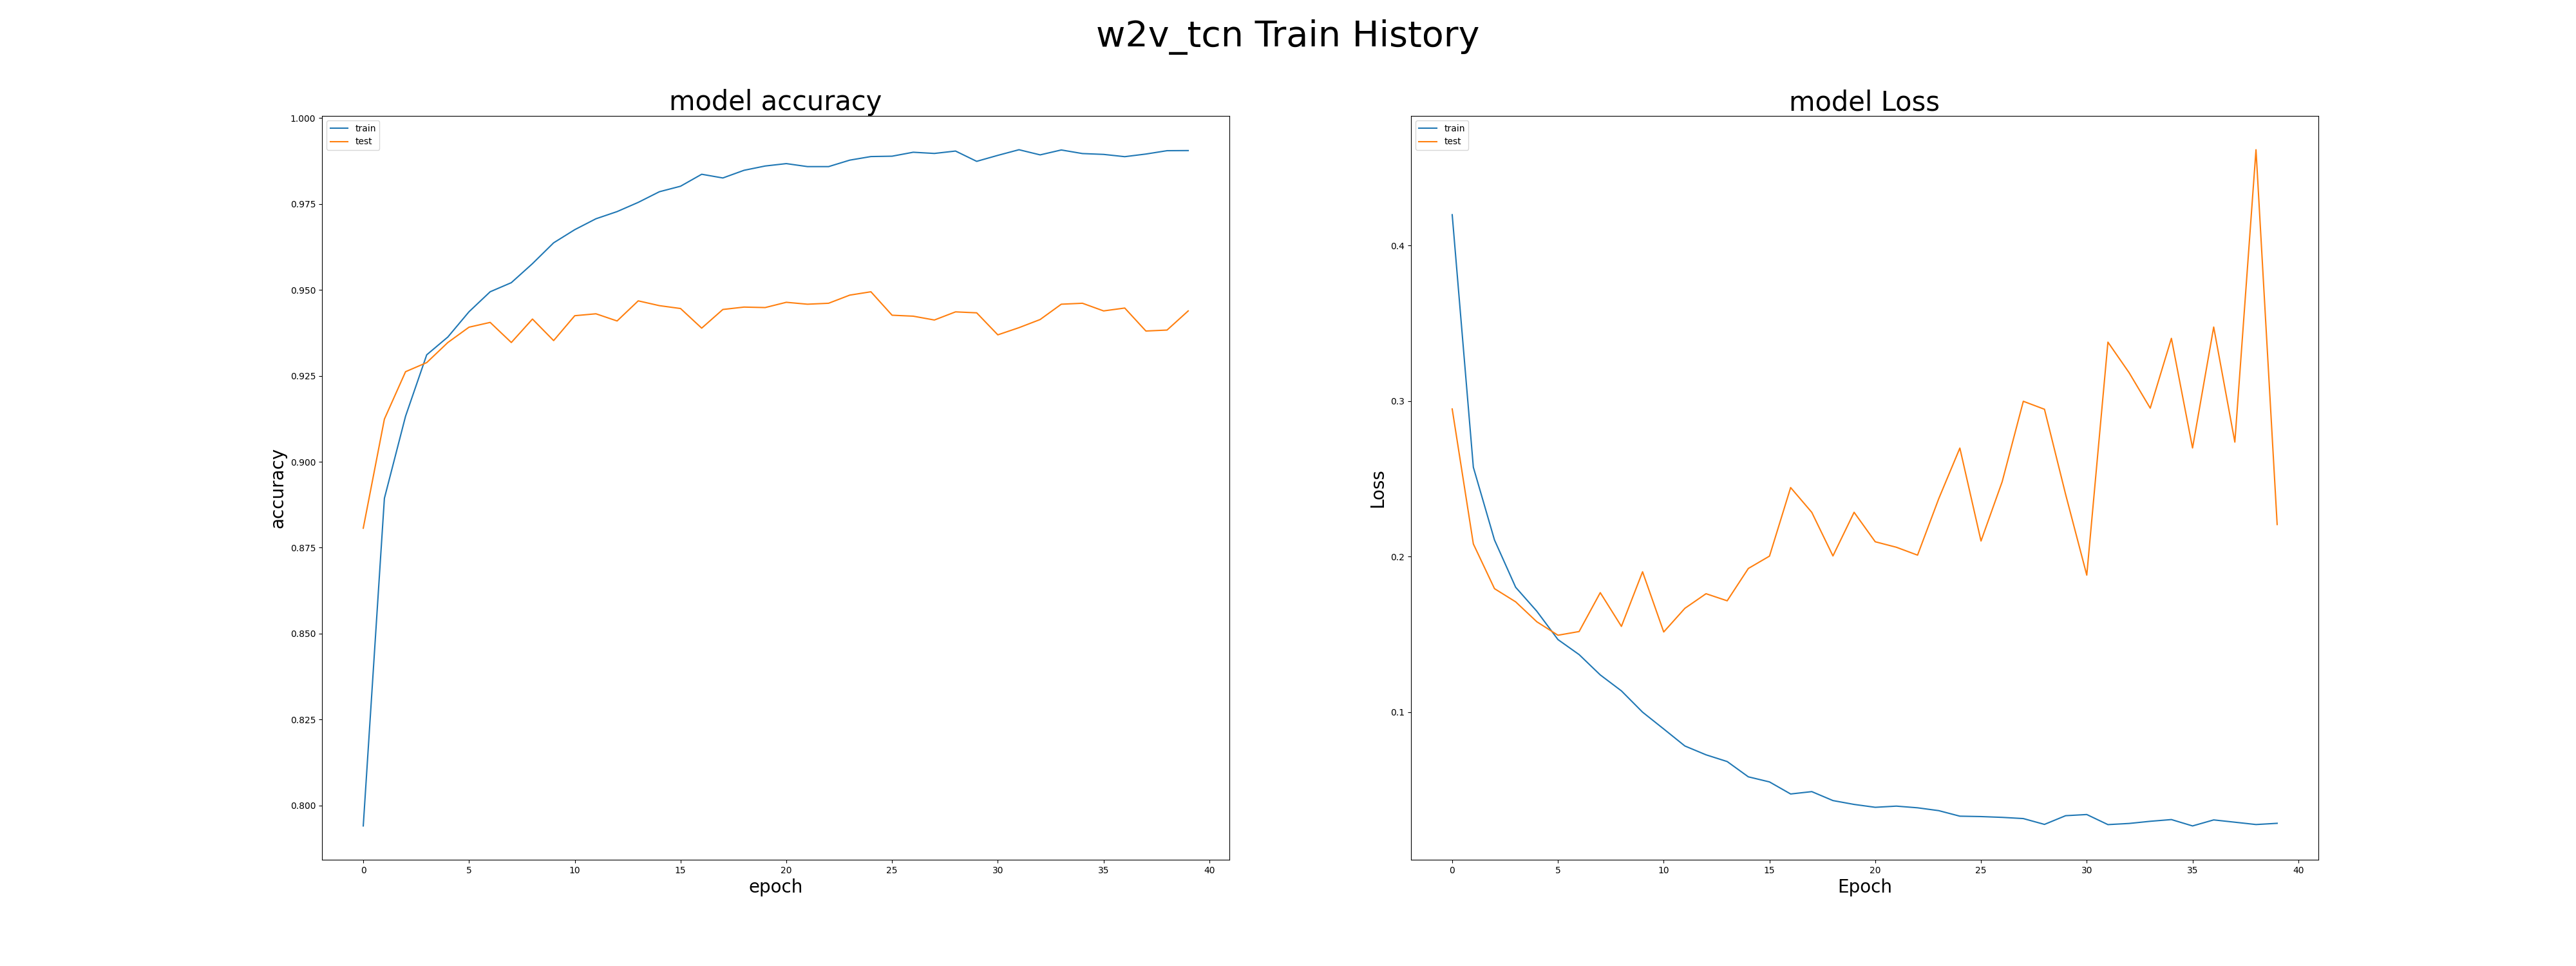

In [27]:

#print train history
display_img('w2v_tcn.png')

##### CNN1D

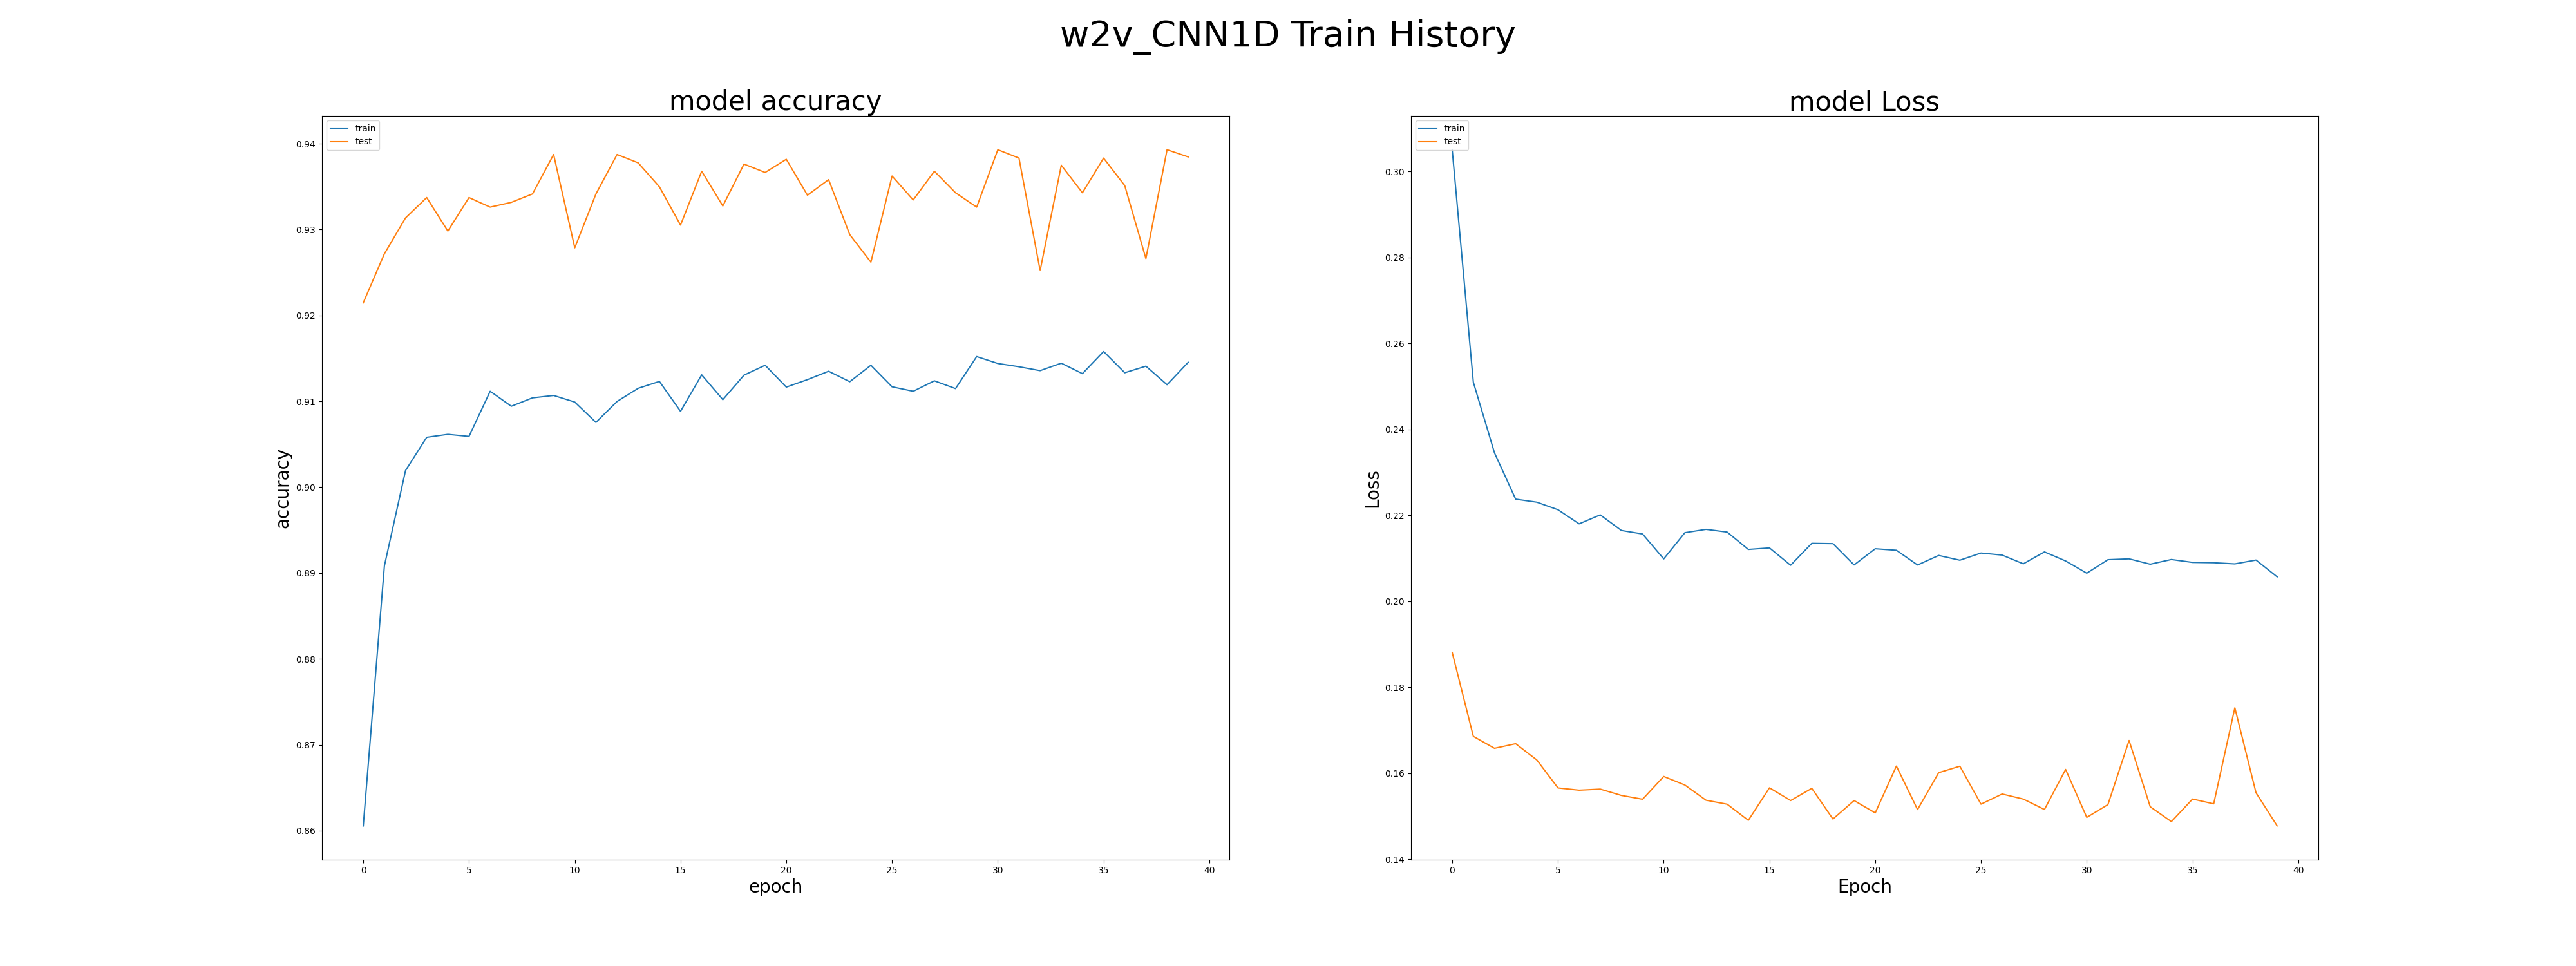

In [28]:

#print train history
display_img('w2v_CNN1D.png')

##### EnsembleCNNBiGRU

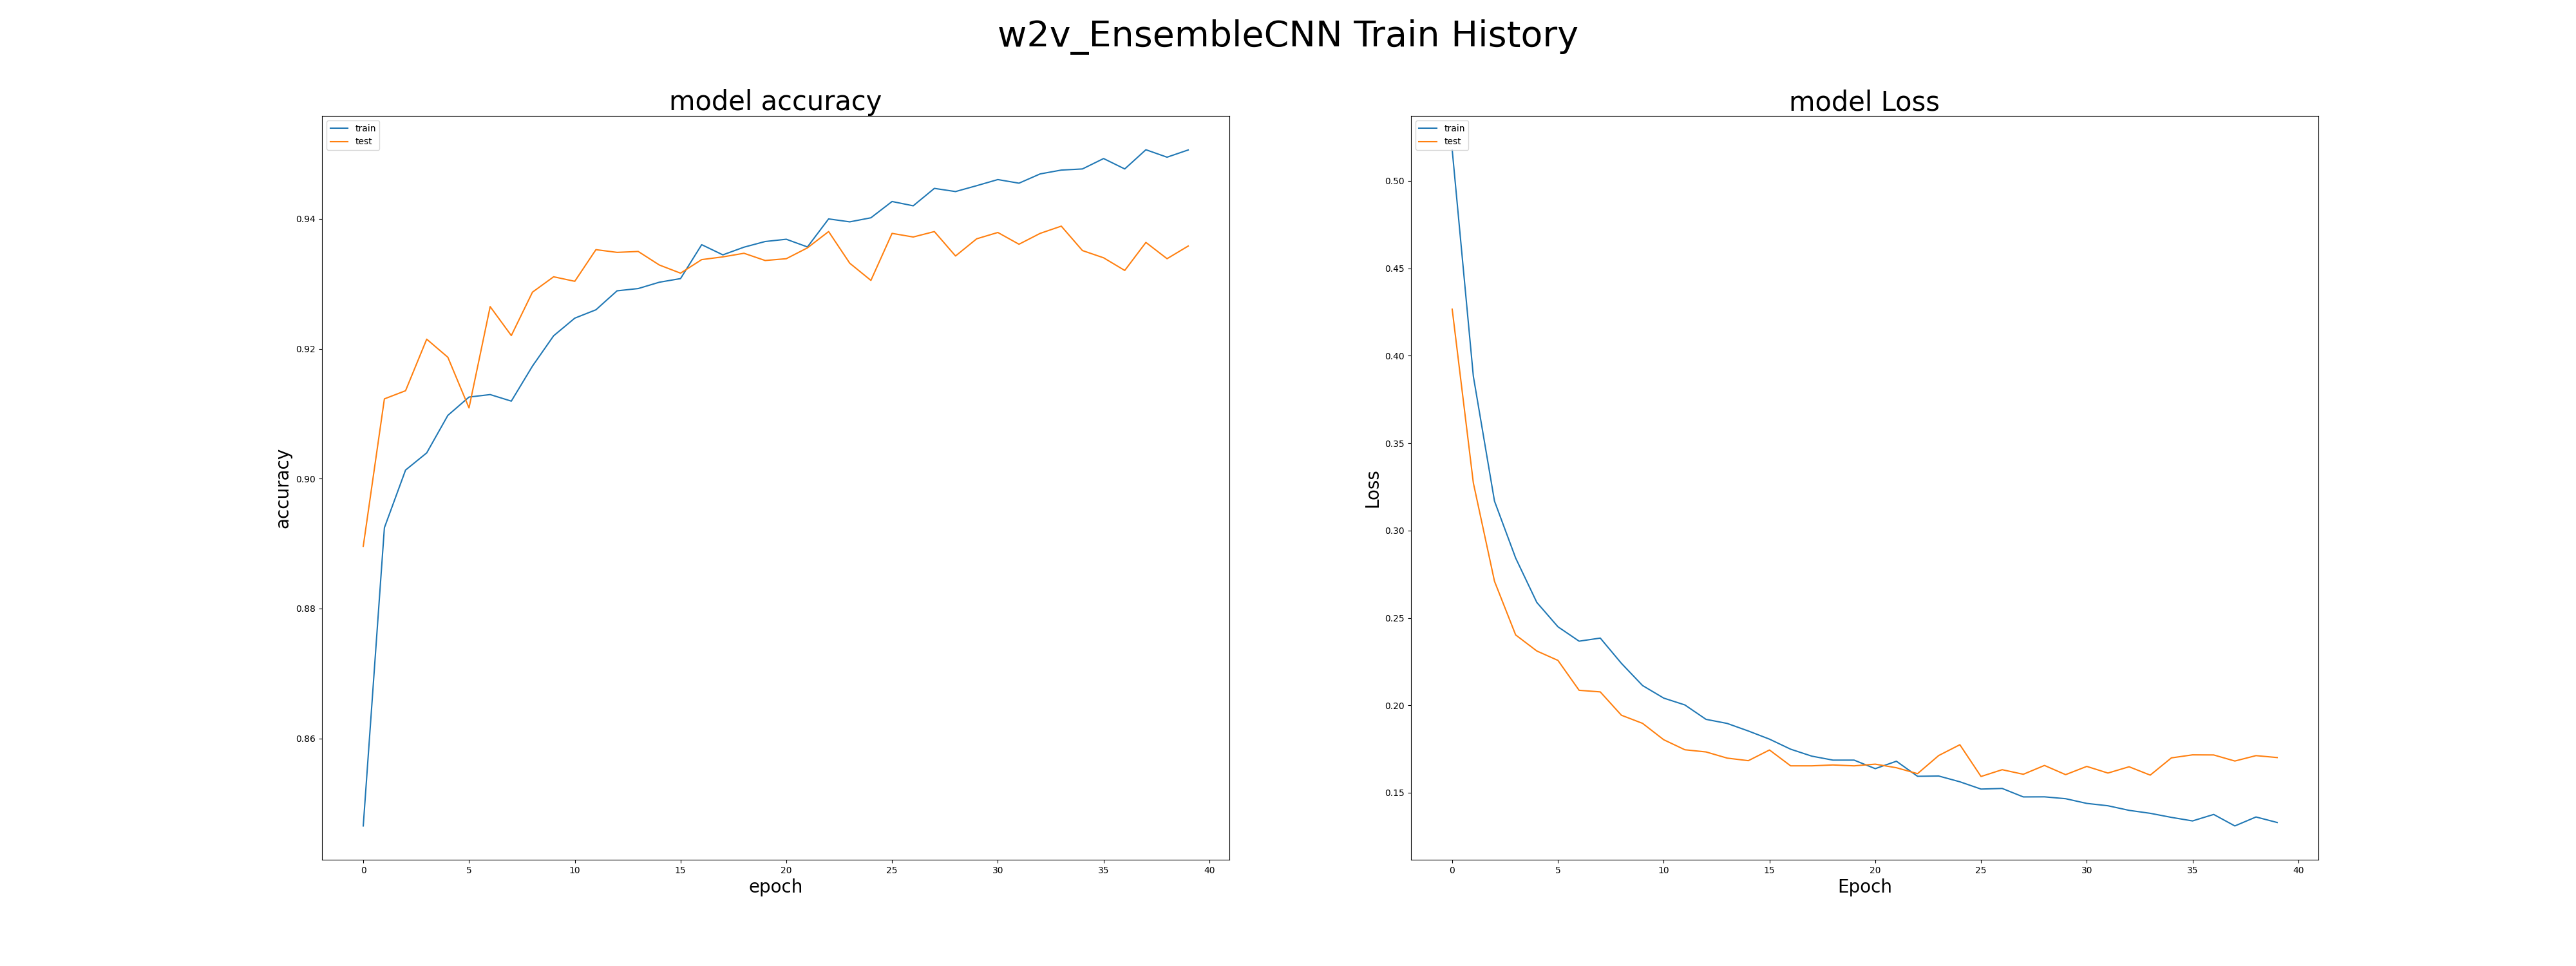

In [29]:
#print train history
display_img('w2v_EnsembleCNN.png')

Aos se realizar os experimentos constatou-se que os modelos gerados a partir do EmsembleLSTM, CNN1D E TCN apresentaram uma forte tendência de overfitting, embora tenham obtido uma grande acurácia nos treinos. Já o simpleDense não obteve qualquer ganho de apresedizado ao longo do treinamento. Por outro lado o modeloe  EnsembleCNN apresentou um desempenho razoável. Ele possi uma leve tendência a overfitting, entretando ele tem uma alta acurácia no treino que está bem próxima da validação, o mesmo vale para o valor da função erro, que ao final das época não apresenta uma distância muito grande,

### Resumo

A seguir um resumo das simulações com os valores das médias de acurária de treino, acurácia de validação , valor da função erro no treino e na validação:

In [30]:
sim_metrics_exp = pd.DataFrame(jsonHandler.read_json(EXPERIMENTATION_TRAIN_PATH + '/sim_metrics.json'))
sim_metrics_exp

,mean_accuracy,mean_loss,mean_val_accuracy,mean_val_loss
emb_doc_EmbeddingLSTM,0.979511,0.052351,0.923430,0.437689
emb_doc_SimpleDense,0.611886,0.627741,0.610993,0.630296
emb_doc_TCN,0.984794,0.040791,0.928700,0.445490
emb_doc_CNN1D,0.951094,0.110870,0.930820,0.251794
emb_doc_EnsembleCNN,0.968352,0.103374,0.928209,0.235296
w2v_EmbeddingLSTM,0.953158,0.117953,0.922243,0.238340
w2v_SimpleDense,0.525414,1.502788,0.516291,0.692801
w2v_tcn,0.923502,0.142806,0.927283,0.269137
w2v_CNN1D,0.905636,0.221868,0.932554,0.167656
w2v_EnsembleCNN,0.933326,0.192281,0.925985,0.202753


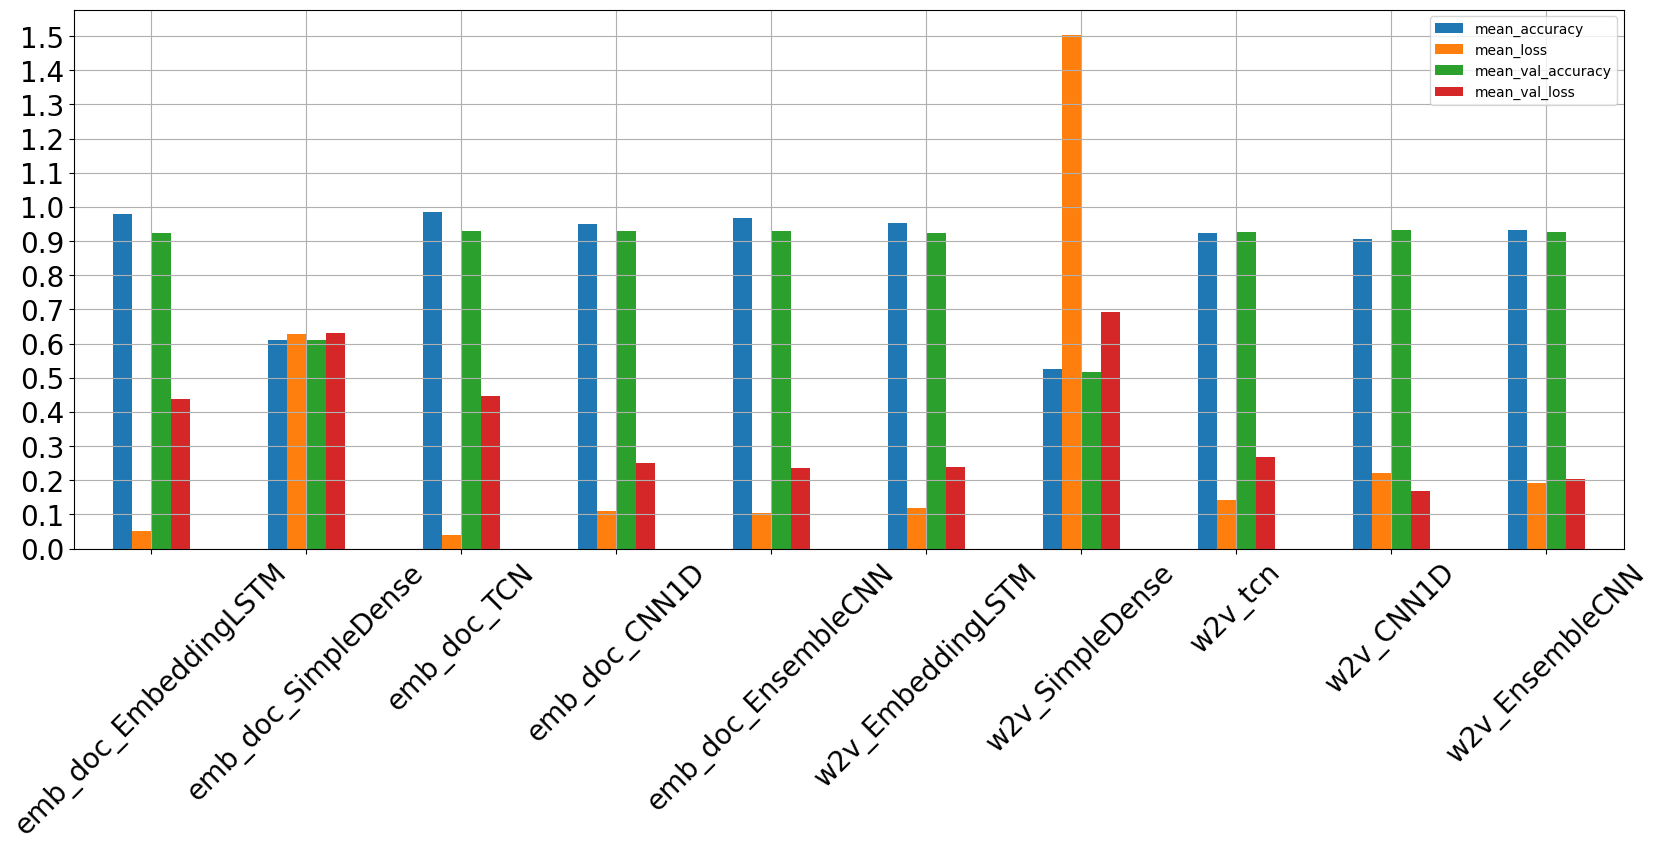

In [31]:
plt.style.use('default')
ax = sim_metrics_exp.plot(kind='bar',figsize=(20,7))
plt.xticks(fontsize=20, rotation=45)
plt.yticks([lbl for lbl in  np.arange(0,1.4+ 0.2,0.1)],fontsize=20)
plt.grid('on')
ax.set_facecolor('white')

Considerando todo o conjunto percebeu-se que  o melhor modelo dentre os gerados foi o modelo w2vEnsembleCNN, justamente porque ele apresentou a maior acurácia média e esta foi próxima da acurácia media de validação. Além disso os erros no treinamendo e validação estão bem próximos na média. O mesmo comportamento foi observado  durante as curvas de treinamento de validação do erro e acurácia, elas se mantiveram bem próximas, entretanto com uma leve tendência de overfitting ao final das épocas. O ideal é que se obtivesse um modelo onde as curvas de acurácia e treino estivessem muito próximas umas das outras, esse não foi o resultado alcançado por este modelo, contudo foi o melhor resultado obtivo ao longo dos experimentos. Sendo assim, faremos o tunelamento deste algorítimo para obter os melhores hiperparâmetros possíveis e assim afetuar o retreinamento e por fim fazer uma  avaliação final.

## Tunelamento do algorítmo EnsembleCNNBiGRU

Ao se fazer o tunelamento de uma arquitetura DeepLearning normalmente se depara com um grande espaço de busca. Com o EnsembleCNNBiGRU isso não poderia ser diferente, ele possui diversos hiperparâmetro que vão desde a quantidade de céluas nas camadas escondida, quantidade de filtros na camadas covolucionais, funções de ativações, otimizadores, dentre muitos outros. Pensando em reduzir o tempo de execução, que por meio do gridSearch (busca exaustiva) seria absurdamente grande, pensou-se em utiliza o Random Search, onde se obtem um que não é o melhor mas algo próximo dele. Sendo assim utilizamos a função RandomSearch oferecida nativamente pelo keras:


<style>
    .code-block {
        background-color: #232b2b;
        padding: 10px;
        border-radius: 5px;
    }
</style>

<div class="code-block">

```python
from kerastuner.tuners import RandomSearch
.
.
.

tuner = RandomSearch(
    lambda hp: create_EnsembleCNN2(hp, vocab_size, emb_matrix),
    objective='val_accuracy',
    max_trials=4,
    executions_per_trial=1,
    directory="/TunellingData/")

tuner.search_space_summary()


tuner.search([X_w2v_train, X_w2v_train], y_w2v_train,
            epochs=20,
            validation_data=([X_w2v_test, X_w2v_test], y_w2v_test))



tuner.results_summary()
```

</div>

Novamente pelo fato do tempo de execução ter sido demorado, a execuão do grid search o foi feita por meio de um script a parte. Nesse  caso utilizamos o scrpit `tunnelingEnsembleCNNBiGRU.py` na pasta  `Modeling\Tunelling` deste projeto.  

Assim oteve-se os seguinte resultados para os melhores hiperparâmetros encontrados:


Resumo da arquitetura:



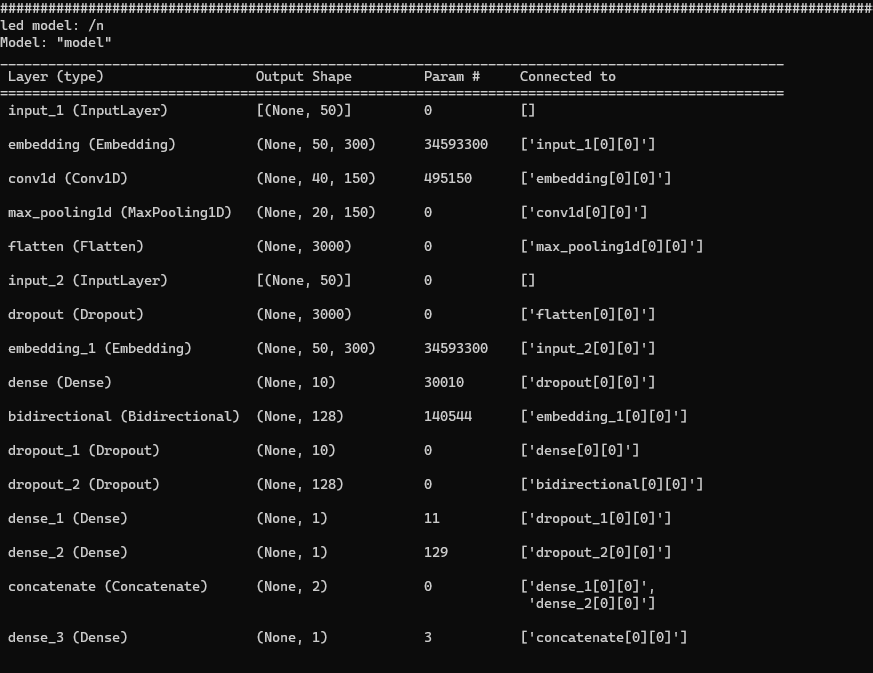

Melhores Hiperparâmetros Encontrados:


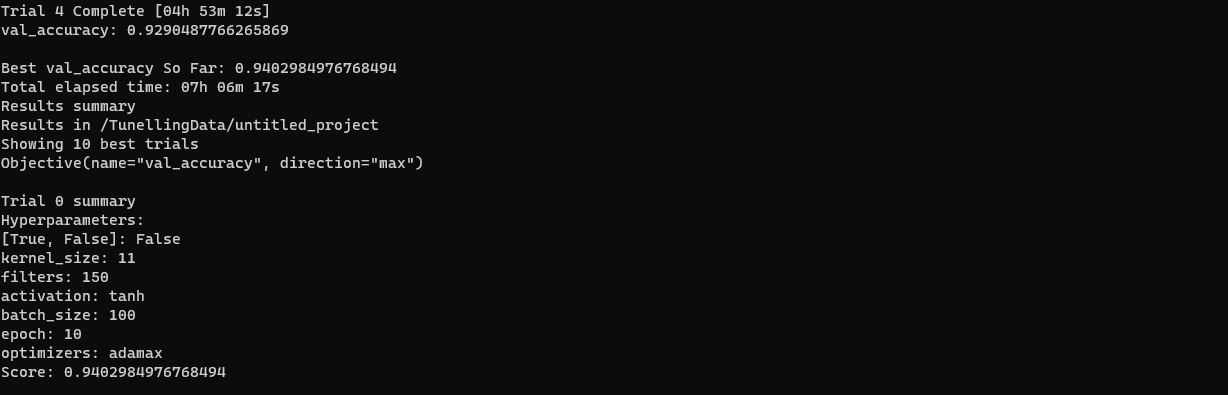

Sendo assim passemos a avaliação do desempenho dete modelo ao longo de seu treinamento:

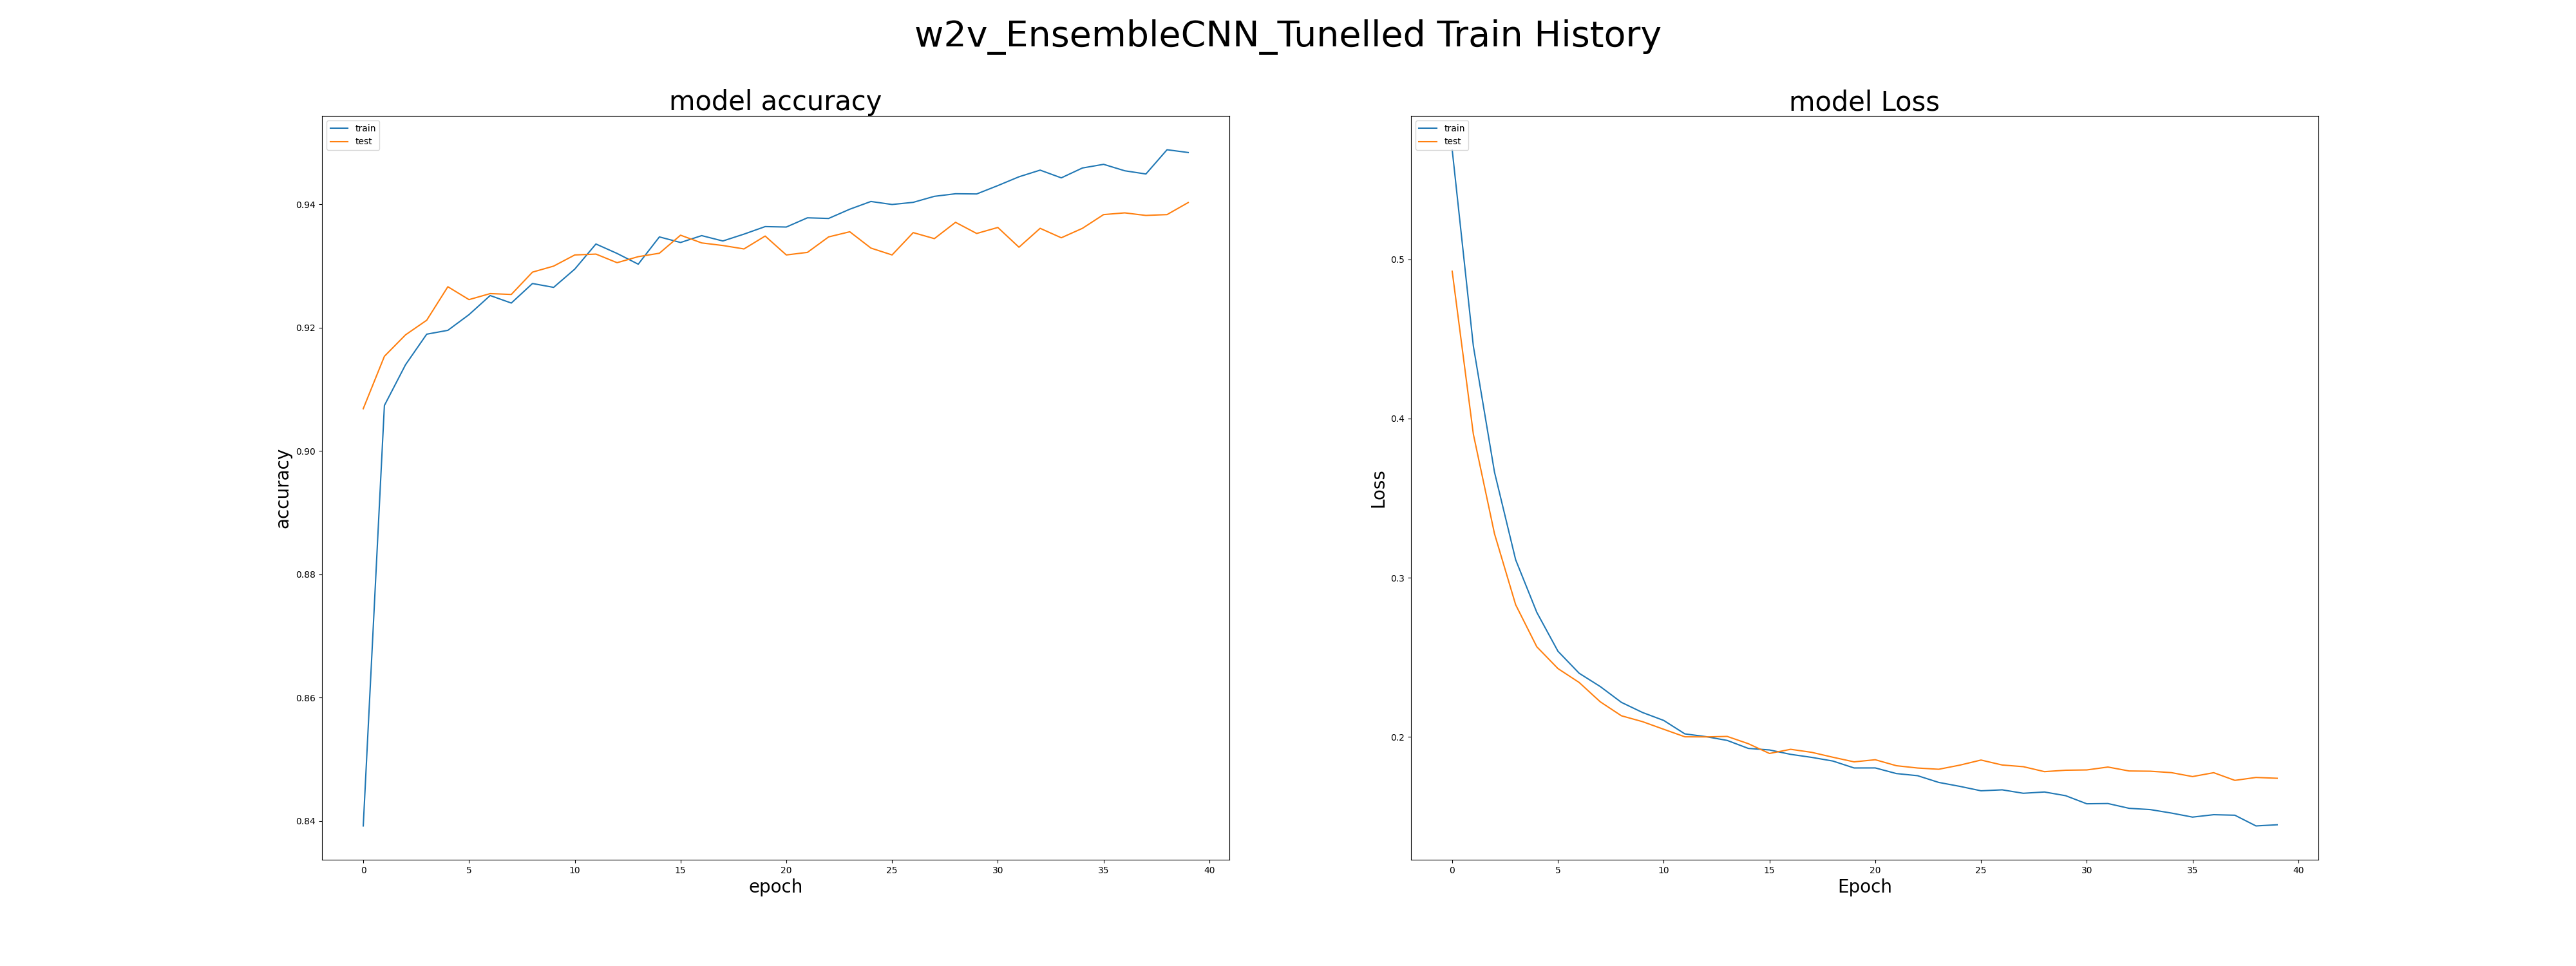

In [32]:
display_img('w2v_EnsembleCNN_Tunelled.png')

In [33]:
sim_metrics = pd.DataFrame(jsonHandler.read_json(TUNNELD_TRAIN_MODEL_PATH + '/sim_metrics_EnsembleCNN_tunneld.json'))
sim_metrics

,mean_accuracy,mean_loss,mean_val_accuracy,mean_val_loss
w2v_EnsembleCNN_Tunelled,0.932792,0.207238,0.93153,0.210112


Consegue-se perceber que a tendência de overfetting foi razoavelmente mitigada, ao mesmo tempo que as curva de validação e de treinamento ficarão ainda mais próximas tanto na acuárica quatno no erro, o que fez o modelo se aproximar ainda mais do ideal, bem acima do que se estava esperando. Obteve-se uma acurácia média de 94% e cerca de 93% na validação.

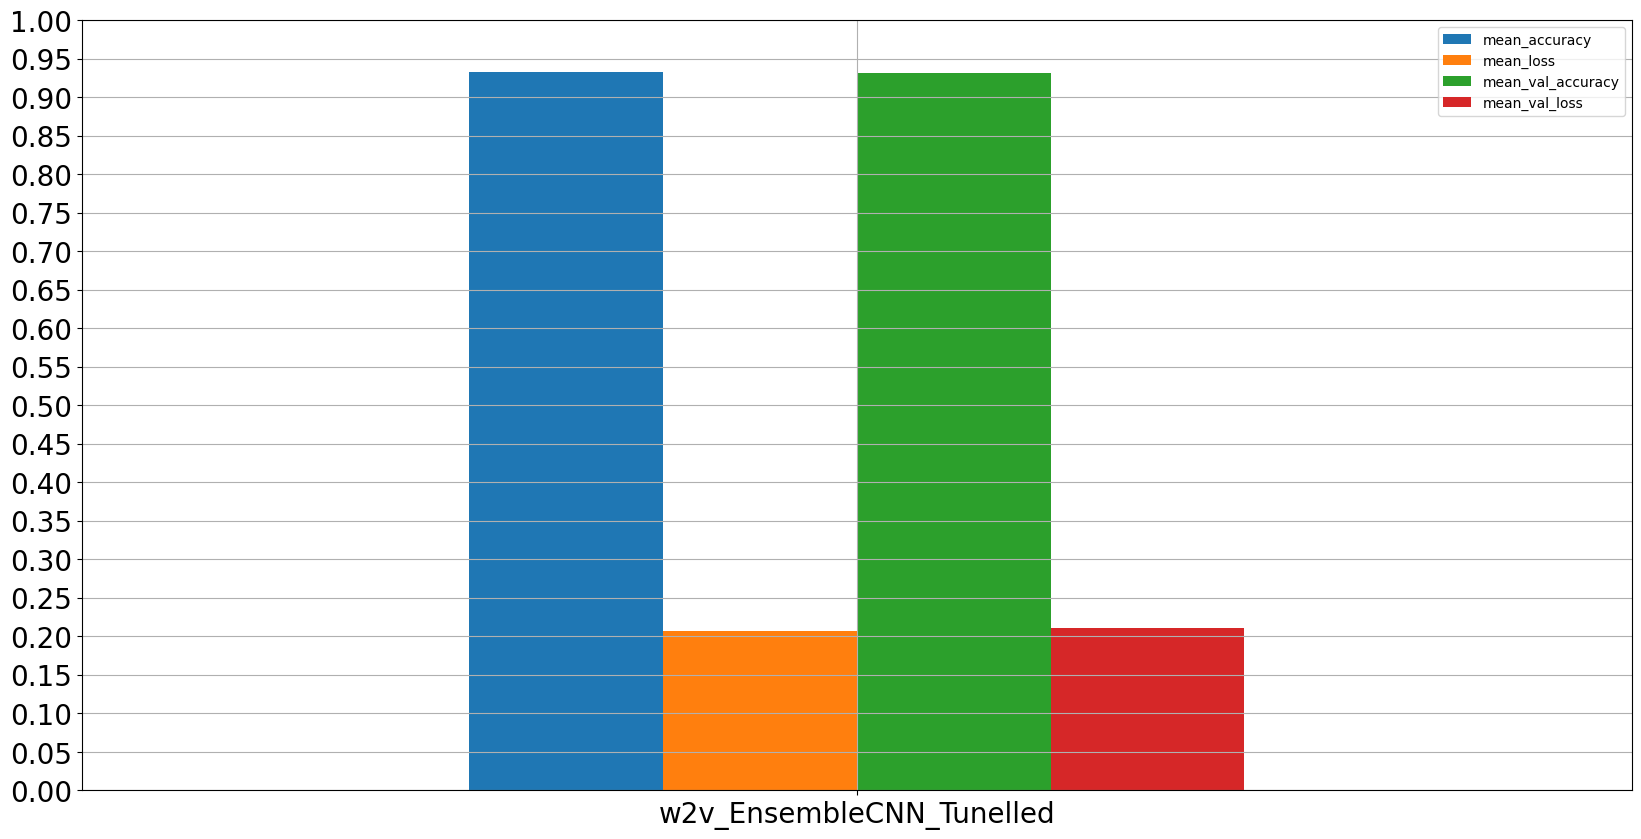

In [34]:
plt.style.use('default')
ax = sim_metrics.plot(kind='bar',figsize=(20,10))
plt.xticks(fontsize=20, rotation=0)
plt.yticks([lbl for lbl in  np.arange(0,1+ 0.05,0.05)],fontsize=20)
plt.grid('on')
ax.set_facecolor('white')

## Teste Modelo Tunelado

A seguir vamos testar o modelo com os dados de validação para avaliar a performance do modelo.

In [35]:
import seaborn as sns
from keras.models import load_model
from sklearn.model_selection import train_test_split

Primeiramente obtemos o modelo pelo arquivo de treinamento de depois disso

In [36]:
#get trained_model
tunnelled_trained_model = load_model(TUNNELD_TRAIN_MODEL_PATH + '/w2v_EnsembleCNN_Tunelled2.h5')


#load data 

news_class = pd.read_csv(DATASET_PATH  + 'news.csv', sep=',')['label']
news_w2v_encoded = np.loadtxt(PREPROCESSED_DATA_PATH +'w2v_word_news_arrays.csv', delimiter= ',')

#get val_data


_, X_test, _, y_test = train_test_split(news_w2v_encoded, news_class, train_size=0.8, random_state=SEED)

In [37]:
tunnelled_trained_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 50, 300)      34732200    ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 44, 200)      420200      ['embedding[0][0]']              
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 22, 200)      0           ['conv1d[0][0]']                 
                                                                                              

In [39]:
# testing model
y_pred = tunnelled_trained_model.predict([X_test, X_test])

281/281 [==============================] - 18s 50ms/step


In [40]:
np.array(y_test)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
y_pred_bin = np.array([1 if el[0] > 0.5 else 0 for el in y_pred], np.int64)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

cf = confusion_matrix(y_test, y_pred_bin)
acc = accuracy_score(y_test, y_pred_bin)
precision = precision_score(y_test, y_pred_bin)
recall =  recall_score(y_test, y_pred_bin)

<Axes: >

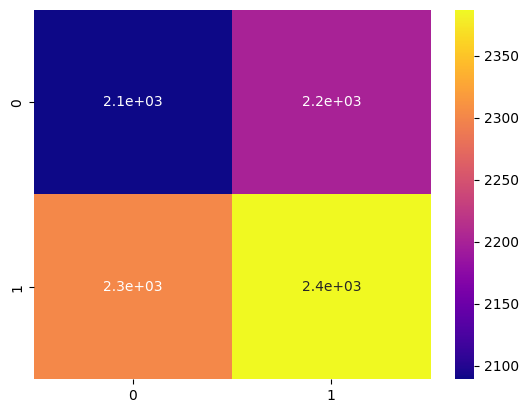

In [71]:
sns.heatmap(cf, cmap='plasma', annot=True)

In [64]:
print('Sklearn-metrics')
print("%s:\t %.2f%%" % ('accuracy',acc))
print("%s:\t %.2f%%" % ('precision', precision))
print("%s:  \t %.2f%%" % ('recall', recall))

Sklearn-metrics
accuracy:	 0.50%
precision:	 0.52%
recall:  	 0.51%


In [65]:
print('Keras-metrics')
loss, accuracy = tunnelled_trained_model.evaluate([X_test, X_test], y_pred_bin, verbose=0)
print("%s: %.2f%%" % (tunnelled_trained_model.metrics_names[1],accuracy*100))
print("%s: %.2f%%" % (tunnelled_trained_model.metrics_names[0],loss*100))

keras metrics
accuracy: 100.00%
loss: 6.19%


O resultados finais foram de fato muito bons. Contudo numa precisão surreal, o que causa certa desconfiança quanta a validade desses resultados. Pensando nisso, vamos fazer um teste simulando o modelo no ambiente de produção. Faremos então o treinamento com todos com dados que temos disponíveis ao invés de uma porcentagem e testaremos o modelo com dados de outro dataset justamente para saber como o modelo se sairia com fora do dataset ao qual previamente ele foi apresentado.

## Teste  Simulando  ambiente de Produção

In [53]:
production_data = np.loadtxt(PREPROCESSED_DATA_PATH + 'w2v_word_news_arrays_production.csv', delimiter=',')
production_labels = np.loadtxt(PREPROCESSED_DATA_PATH + 'labels_production.csv', delimiter=',')

In [57]:
#load model

production_model = load_model(TUNNELD_TRAIN_MODEL_PATH + '/w2v_EnsembleCNN_production.h5')

In [66]:
y_pred_prod = production_model.predict([production_data, production_data])

938/938 [==============================] - 53s 53ms/step


In [74]:
y_pred_prod =   np.array([1 if el[0] > 0.5 else 0 for el in y_pred_prod], np.int64)

In [75]:
cf = confusion_matrix(production_labels, y_pred_prod)
acc = accuracy_score(production_labels, y_pred_prod)
precision = precision_score(production_labels, y_pred_prod)
recall =  recall_score(production_labels, y_pred_prod)
print('Sklearn-metrics')
print("%s:\t %.2f%%" % ('accuracy',acc))
print("%s:\t %.2f%%" % ('precision', precision))
print("%s:  \t %.2f%%" % ('recall', recall))

Sklearn-metrics
accuracy:	 0.51%
precision:	 0.71%
recall:  	 0.06%


In [76]:
print('Keras-metrics')
loss, accuracy = production_model.evaluate([production_data, production_data], production_labels, verbose=0)
print("%s: %.2f%%" % (tunnelled_trained_model.metrics_names[1],accuracy*100))
print("%s: %.2f%%" % (tunnelled_trained_model.metrics_names[0],loss*100))


Keras-metrics
accuracy: 50.60%
loss: 69.07%
